In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/lof/data-lof-2024-06-10.csv")
df = pd.read_csv("data/inc/data-inc-2024-06-17.csv")

/tmp/ipykernel_8335/1592264906.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_init = pd.read_csv("data/lof/data-lof-2024-06-10.csv")


In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196616 entries, 0 to 196615
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        196616 non-null  int64  
 1   id_mls                    196616 non-null  object 
 2   bathrooms_total           196616 non-null  float64
 3   bedrooms_extra            196616 non-null  float64
 4   bedrooms                  196616 non-null  float64
 5   stories_total             196616 non-null  float64
 6   size_interior             196616 non-null  float64
 7   building_type             196616 non-null  object 
 8   agency_name               196616 non-null  object 
 9   agency_type               196616 non-null  object 
 10  property_type             196616 non-null  object 
 11  lng                       196616 non-null  float64
 12  lat                       196616 non-null  float64
 13  ownership_type            196616 non-null  o

# First Glance

In [4]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27049896,24013932,0,0,2.0,NaN,Multi-Family,JUMP REALTY INC.,Firm,Multi-family,...,42.102636,Freehold,1,70.30x120.51 as per geo,0,https://realtor.ca/real-estate/27049896/167-mu...,638542210394800000,N9V1J4,Ontario,549900.0
1,27049784,24013752,2,2 + 0,1.0,1545.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.131907,Freehold,1,53.54X132.68 ft,0,https://realtor.ca/real-estate/27049784/236-mc...,638541963623700000,N9V3Y7,Ontario,739900.0
2,27047465,24013917,2,4 + 3,1.0,NaN,House,KELLER WILLIAMS LIFESTYLES REALTY,Firm,Single Family,...,42.308264,Freehold,1,33X102 FT,0,https://realtor.ca/real-estate/27047465/445-br...,638540500723000000,N9B2M3,Ontario,399900.0
3,27045966,24013913,0,0,3.5,NaN,Fourplex,SAVE MAX WINCITY REALTY,Firm,Multi-family,...,42.314431,Freehold,1,46.49X129,0,https://realtor.ca/real-estate/27045966/667-wi...,638539996702500000,N9A1J6,Ontario,299000.0
4,27045805,X8443402,2,3 + 2,1.0,NaN,House,HOMELIFE/MIRACLE REALTY LTD,Firm,Single Family,...,42.265735,Freehold,1,60 x 111 M|under 1/2 acre,3,https://realtor.ca/real-estate/27045805/3190-m...,638539979043000000,N9E2T9,Ontario,499000.0


In [5]:
df.shape

(26632, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26632 entries, 0 to 26631
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        26632 non-null  int64  
 1   id_mls                    26632 non-null  object 
 2   bathrooms_total           26632 non-null  int64  
 3   bedrooms                  26632 non-null  object 
 4   stories_total             17464 non-null  float64
 5   size_interior             13961 non-null  object 
 6   building_type             26632 non-null  object 
 7   agency_name               26632 non-null  object 
 8   agency_type               26632 non-null  object 
 9   property_type             26632 non-null  object 
 10  lng                       26632 non-null  float64
 11  lat                       26632 non-null  float64
 12  ownership_type            26632 non-null  object 
 13  ownership_type_group_ids  26632 non-null  object 
 14  land_s

In [7]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,27049784,24013752,2,2 + 0,1.0,1545.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.131907,Freehold,1,53.54X132.68 ft,0,https://realtor.ca/real-estate/27049784/236-mc...,638541963623700000,N9V3Y7,Ontario,739900.0
11,27044439,24013880,5,4 + 3,NaN,2150.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,Single Family,...,42.273350,Freehold,1,50X114,0,https://realtor.ca/real-estate/27044439/2499-r...,638539888870200000,N9E0A9,Ontario,1099999.0
17,27043255,24013860,2,4 + 0,2.0,1427.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,Single Family,...,42.320516,Freehold,1,36X146.41,0,https://realtor.ca/real-estate/27043255/456-la...,638539816801600000,N9A2G4,Ontario,279900.0
19,27042116,24013836,1,1 + 0,NaN,630.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.097665,none,none,0X,0,https://realtor.ca/real-estate/27042116/120-pi...,638539744786530000,N9Y3N3,Ontario,289900.0
24,27041566,24013770,3,3 + 0,1.0,2250.0000,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,Single Family,...,42.244971,Freehold,1,60X183,0,https://realtor.ca/real-estate/27041566/4339-c...,638539672596230000,N9G2A9,Ontario,895000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26626,27025336,5842,2,5,NaN,2079 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.461704,none,none,6021,0,https://realtor.ca/real-estate/27025336/4708-h...,638537289600400000,NaN,Northwest Territories,249000.0
26627,27024413,5841,2,3,NaN,1216 sqft,Mobile Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.445982,Condominium/Strata,2,3514,0,https://realtor.ca/real-estate/27024413/642-an...,638537235871430000,NaN,Northwest Territories,319000.0
26628,27020034,5839,4,4,NaN,2766 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.465596,none,none,5124,0,https://realtor.ca/real-estate/27020034/144-mo...,638536461470030000,NaN,Northwest Territories,1495000.0
26629,27018042,5838,2,2,NaN,1505 sqft,Duplex,COLDWELL BANKER NBS,Firm,Single Family,...,62.450572,none,none,50 X 129,0,https://realtor.ca/real-estate/27018042/113-he...,638536353377330000,X1A3P8,Northwest Territories,455000.0


In [8]:
df_with_size["province"].value_counts()

province
British Columbia           4375
Ontario                    3425
Alberta                    2868
Quebec                     1506
Manitoba                    624
Saskatchewan                612
New Brunswick               371
Newfoundland & Labrador     147
Yukon                        18
Northwest Territories        14
Prince Edward Island          1
Name: count, dtype: int64

In [9]:
df["province"].value_counts()

province
Ontario                    12738
British Columbia            4658
Quebec                      3378
Alberta                     3011
Manitoba                     700
Saskatchewan                 679
Nova Scotia                  603
New Brunswick                501
Newfoundland & Labrador      184
Prince Edward Island         146
Yukon                         20
Northwest Territories         14
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,26632.0,26632.0,17464.0,26632.0,26632.0,26632.0,2.663200e+04,26632.0
mean,27033009.0,2.0,2.0,-90.0,47.0,3.0,6.385384e+17,900900.0
std,9810.0,1.0,4.0,20.0,3.0,5.0,1.436300e+12,1264841.0
min,27015631.0,0.0,0.0,-135.0,42.0,0.0,6.385355e+17,1.0
25%,27024635.0,1.0,1.0,-114.0,44.0,0.0,6.385372e+17,435000.0
50%,27033194.0,2.0,2.0,-80.0,45.0,1.0,6.385383e+17,679900.0
75%,27041494.0,3.0,2.0,-79.0,49.0,4.0,6.385397e+17,999999.0
max,27050042.0,13.0,286.0,-53.0,72.0,516.0,6.385422e+17,82800000.0


# Remove Duplicates

In [11]:
len(df["id"].unique())

26608

In [12]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

48


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
8055,27017647,W8422786,2,3,1.0,NaN,House,RE/MAX PREMIER THE OP TEAM,Firm,Single Family,...,43.737645,Freehold,1,50 x 120 FT,7,https://realtor.ca/real-estate/27017647/67-sam...,638536306886130000,M9M2N2,Ontario,1258000.0
8054,27017647,W8422786,2,3,1.0,NaN,House,RE/MAX PREMIER THE OP TEAM,Firm,Single Family,...,43.737645,Freehold,1,50 x 120 FT,7,https://realtor.ca/real-estate/27017647/67-sam...,638536306886130000,M9M2N2,Ontario,1258000.0
20652,27017959,R2891964,2,2,16.0,1167.0000,Apartment,Royal LePage Little Oak Realty,Firm,Single Family,...,49.058602,Strata,2,NaN,2,https://realtor.ca/real-estate/27017959/1204-3...,638536339107500000,V2T5T1,British Columbia,550000.0
20651,27017959,R2891964,2,2,16.0,1167.0000,Apartment,Royal LePage Little Oak Realty,Firm,Single Family,...,49.058602,Strata,2,NaN,2,https://realtor.ca/real-estate/27017959/1204-3...,638536339107500000,V2T5T1,British Columbia,550000.0
7857,27018755,W8423686,1,1 + 1,NaN,NaN,Apartment,CENTURY 21 PEOPLE'S CHOICE REALTY INC.,Firm,Single Family,...,43.642622,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27018755/423-8-...,638536383850530000,M8Z0C3,Ontario,629000.0
7854,27018755,W8423686,1,1 + 1,NaN,NaN,Apartment,CENTURY 21 PEOPLE'S CHOICE REALTY INC.,Firm,Single Family,...,43.642622,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27018755/423-8-...,638536383850530000,M8Z0C3,Ontario,629000.0
10225,27019649,N8423780,2,2,NaN,NaN,Apartment,KELLER WILLIAMS REALTY CENTRES,Firm,Single Family,...,44.018507,Leasehold Condo/Strata,2,.,1,https://realtor.ca/real-estate/27019649/702-46...,638536449643630000,L4G1X9,Ontario,871397.0
10223,27019649,N8423780,2,2,NaN,NaN,Apartment,KELLER WILLIAMS REALTY CENTRES,Firm,Single Family,...,44.018507,Leasehold Condo/Strata,2,.,1,https://realtor.ca/real-estate/27019649/702-46...,638536449643630000,L4G1X9,Ontario,871397.0
25972,27024084,E4392032,2,4,1.0,87.34 m2,House,Initia Real Estate,Firm,Single Family,...,53.588414,Freehold,1,NaN,0,https://realtor.ca/real-estate/27024084/12931-...,638537212456030000,T5E5B4,Alberta,349000.0
25973,27024084,E4392032,2,4,1.0,87.34 m2,House,Initia Real Estate,Firm,Single Family,...,53.588414,Freehold,1,NaN,0,https://realtor.ca/real-estate/27024084/12931-...,638537212456030000,T5E5B4,Alberta,349000.0


In [13]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
8055,27017647,W8422786,2,3,1.0,NaN,House,RE/MAX PREMIER THE OP TEAM,Firm,Single Family,...,43.737645,Freehold,1,50 x 120 FT,7,https://realtor.ca/real-estate/27017647/67-sam...,638536306886130000,M9M2N2,Ontario,1258000.0
20652,27017959,R2891964,2,2,16.0,1167.0000,Apartment,Royal LePage Little Oak Realty,Firm,Single Family,...,49.058602,Strata,2,NaN,2,https://realtor.ca/real-estate/27017959/1204-3...,638536339107500000,V2T5T1,British Columbia,550000.0
7857,27018755,W8423686,1,1 + 1,NaN,NaN,Apartment,CENTURY 21 PEOPLE'S CHOICE REALTY INC.,Firm,Single Family,...,43.642622,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27018755/423-8-...,638536383850530000,M8Z0C3,Ontario,629000.0
10225,27019649,N8423780,2,2,NaN,NaN,Apartment,KELLER WILLIAMS REALTY CENTRES,Firm,Single Family,...,44.018507,Leasehold Condo/Strata,2,.,1,https://realtor.ca/real-estate/27019649/702-46...,638536449643630000,L4G1X9,Ontario,871397.0
25973,27024084,E4392032,2,4,1.0,87.34 m2,House,Initia Real Estate,Firm,Single Family,...,53.588414,Freehold,1,NaN,0,https://realtor.ca/real-estate/27024084/12931-...,638537212456030000,T5E5B4,Alberta,349000.0
10846,27024440,X8427504,2,3 + 1,1.0,NaN,House,RE/MAX HALLMARK EASTERN REALTY,Firm,Single Family,...,44.489540,Freehold,1,74.93 x 200 FT,5,https://realtor.ca/real-estate/27024440/422-ma...,638537237922230000,K0K2M0,Ontario,590000.0
6855,27025746,E8428636,6,5 + 1,2.0,NaN,House,HARVEY KALLES REAL ESTATE LTD.,Firm,Single Family,...,43.808685,Freehold,1,56.58 x 182.03 FT ; Irregular,15,https://realtor.ca/real-estate/27025746/564-pa...,638537313741300000,L1W0B2,Ontario,2399000.0
18780,27026908,R2893519,3,4,NaN,1655 sqft,Row / Townhouse,Oakwyn Realty Ltd.,Firm,Single Family,...,49.279489,Strata,2,0,0,https://realtor.ca/real-estate/27026908/2-709-...,638537395467930000,V6A1Y6,British Columbia,1395000.0
20052,27027666,R2893648,3,4,1.0,3450 sqft,House,RE/MAX All Points Realty,Firm,Single Family,...,49.299811,Freehold,1,7664 sqft,6,https://realtor.ca/real-estate/27027666/1421-p...,638537468049100000,V3E2T6,British Columbia,1849000.0
6257,27029487,W8431070,1,1 + 1,NaN,NaN,Apartment,CITYSCAPE REAL ESTATE LTD.,Firm,Single Family,...,43.379801,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27029487/219-40...,638538041326300000,L7M0H2,Ontario,537499.0


In [14]:
df = df.drop_duplicates(subset="id", keep=False)

In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [16]:
# df = df.drop(["id", "id_mls"], axis=1)

In [17]:
df.shape

(26584, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26584 entries, 0 to 26631
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        26584 non-null  int64  
 1   id_mls                    26584 non-null  object 
 2   bathrooms_total           26584 non-null  int64  
 3   bedrooms                  26584 non-null  object 
 4   stories_total             17434 non-null  float64
 5   size_interior             13943 non-null  object 
 6   building_type             26584 non-null  object 
 7   agency_name               26584 non-null  object 
 8   agency_type               26584 non-null  object 
 9   property_type             26584 non-null  object 
 10  lng                       26584 non-null  float64
 11  lat                       26584 non-null  float64
 12  ownership_type            26584 non-null  object 
 13  ownership_type_group_ids  26584 non-null  object 
 14  land_size  

In [19]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  15423
Condominium/Strata         4368
none                       3797
Strata                     1991
Condominium                 540
Leasehold                   185
Freehold Condo               70
Leasehold Condo/Strata       62
Undivided Co-ownership       42
Leasehold/Leased Land        41
Shares in Co-operative       23
Other, See Remarks           15
Unknown                      10
Timeshare/Fractional          9
Cooperative                   5
Life Lease                    3
Name: count, dtype: int64

In [20]:
df["building_type"].value_counts()

building_type
House                       15252
Apartment                    4854
Row / Townhouse              2785
none                         1939
Duplex                        674
Mobile Home                   197
Triplex                       139
Multi-Family                  129
No Building                   117
Manufactured Home             108
Recreational                   92
Other                          92
Fourplex                       77
Unknown                        71
Manufactured Home/Mobile       24
Modular                        23
Two Apartment House             6
Parking                         4
Commercial Mix                  1
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold                  51
none                      17
Strata                     8
Leasehold/Leased Land      6
Condominium/Strata         3
Shares in Co-operative     3
Freehold Condo             2
Other, See Remarks         2
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [23]:
df["property_type"].value_counts()

property_type
Single Family    24317
Vacant Land       1713
Multi-family       355
Agriculture        101
Recreational        94
Parking              4
Name: count, dtype: int64

In [24]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [25]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [26]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [27]:
df_sf = df[df["property_type"] == "Single Family"]

In [28]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24317 entries, 1 to 26631
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        24317 non-null  int64  
 1   id_mls                    24317 non-null  object 
 2   bathrooms_total           24317 non-null  int64  
 3   bedrooms                  24317 non-null  object 
 4   stories_total             17099 non-null  float64
 5   size_interior             13611 non-null  object 
 6   building_type             24317 non-null  object 
 7   agency_name               24317 non-null  object 
 8   agency_type               24317 non-null  object 
 9   property_type             24317 non-null  object 
 10  lng                       24317 non-null  float64
 11  lat                       24317 non-null  float64
 12  ownership_type            24317 non-null  object 
 13  ownership_type_group_ids  24317 non-null  object 
 14  land_size  

In [29]:
df_sf["province"].value_counts()

province
Ontario                    11979
British Columbia            4323
Quebec                      2917
Alberta                     2828
Manitoba                     620
Saskatchewan                 610
Nova Scotia                  449
New Brunswick                351
Newfoundland & Labrador      131
Prince Edward Island          79
Yukon                         16
Northwest Territories         14
Name: count, dtype: int64

In [30]:
df_sf["building_type"].value_counts()

building_type
House                       15231
Apartment                    4844
Row / Townhouse              2782
Duplex                        576
none                          308
Mobile Home                   196
Triplex                       110
Manufactured Home             107
Fourplex                       49
Recreational                   49
Manufactured Home/Mobile       24
Modular                        23
Other                          10
Two Apartment House             6
Multi-Family                    2
Name: count, dtype: int64

In [31]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  14259
Condominium/Strata         4348
none                       2766
Strata                     1962
Condominium                 535
Leasehold                   185
Freehold Condo               70
Leasehold Condo/Strata       62
Undivided Co-ownership       42
Leasehold/Leased Land        33
Shares in Co-operative       19
Other, See Remarks           11
Timeshare/Fractional          9
Unknown                       8
Cooperative                   5
Life Lease                    3
Name: count, dtype: int64

In [32]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
19,27042116,24013836,1,1 + 0,NaN,630.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.097665,none,none,0X,0,https://realtor.ca/real-estate/27042116/120-pi...,638539744786530000,N9Y3N3,Ontario,289900.0
76,27027916,X8430134,8,6 + 6,1.0,NaN,Fourplex,GRACE CANADA REALTY INC.,Firm,Single Family,...,42.293613,none,none,58.5 x 120 FT,0,https://realtor.ca/real-estate/27027916/3549-p...,638537527470070000,N9C1J6,Ontario,1383800.0
136,27049915,24013802,2,3 + 0,1.0,NaN,House,"EXP REALTY, BROKERAGE",Firm,Single Family,...,42.973946,none,none,60X130,0,https://realtor.ca/real-estate/27049915/8-mayf...,638542215677730000,N7S1K8,Ontario,399900.0
155,27044607,X8443042,1,3,1.5,NaN,House,BLUE COAST REALTY LTD,Firm,Single Family,...,42.698021,none,none,50 x 176.23 FT ; 49.90 x 176.23 x 49.78 x ...,0,https://realtor.ca/real-estate/27044607/1110-r...,638539896807500000,N0P2H0,Ontario,564900.0
201,27041556,24013814,2,2 + 0,1.0,1704.0000,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.261812,none,none,38XIRREG,0,https://realtor.ca/real-estate/27041556/592-li...,638539672571470000,N6E3N7,Ontario,849900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26624,27030872,5844,3,4,NaN,2226 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.448637,none,none,6329,0,https://realtor.ca/real-estate/27030872/5621-5...,638538105381670000,NaN,Northwest Territories,650000.0
26625,27027209,5843,4,5,NaN,1282 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.444293,none,none,13572,0,https://realtor.ca/real-estate/27027209/6003-f...,638537433318530000,NaN,Northwest Territories,799900.0
26626,27025336,5842,2,5,NaN,2079 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.461704,none,none,6021,0,https://realtor.ca/real-estate/27025336/4708-h...,638537289600400000,NaN,Northwest Territories,249000.0
26628,27020034,5839,4,4,NaN,2766 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.465596,none,none,5124,0,https://realtor.ca/real-estate/27020034/144-mo...,638536461470030000,NaN,Northwest Territories,1495000.0


In [33]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

19       https://realtor.ca/real-estate/27042116/120-pi...
76       https://realtor.ca/real-estate/27027916/3549-p...
136      https://realtor.ca/real-estate/27049915/8-mayf...
155      https://realtor.ca/real-estate/27044607/1110-r...
201      https://realtor.ca/real-estate/27041556/592-li...
                               ...                        
26624    https://realtor.ca/real-estate/27030872/5621-5...
26625    https://realtor.ca/real-estate/27027209/6003-f...
26626    https://realtor.ca/real-estate/27025336/4708-h...
26628    https://realtor.ca/real-estate/27020034/144-mo...
26629    https://realtor.ca/real-estate/27018042/113-he...
Name: page_url, Length: 2766, dtype: object

In [34]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

834      https://realtor.ca/real-estate/27047491/70-blu...
1072     https://realtor.ca/real-estate/27030150/9-hick...
1221     https://realtor.ca/real-estate/27045167/22-che...
1287     https://realtor.ca/real-estate/27035767/12-gar...
1342     https://realtor.ca/real-estate/27025376/41-alg...
1671     https://realtor.ca/real-estate/27041777/15-bus...
2365     https://realtor.ca/real-estate/27023319/116-ma...
7122     https://realtor.ca/real-estate/27023813/23-fou...
9161     https://realtor.ca/real-estate/27024002/3-murr...
9163     https://realtor.ca/real-estate/27023805/202-sp...
9485     https://realtor.ca/real-estate/27041814/3282-o...
9486     https://realtor.ca/real-estate/27041813/3282-o...
9846     https://realtor.ca/real-estate/27031275/5411-e...
9904     https://realtor.ca/real-estate/27029860/24-map...
9947     https://realtor.ca/real-estate/27028554/3282-o...
9948     https://realtor.ca/real-estate/27028553/3282-o...
9949     https://realtor.ca/real-estate/27028552/3282-o.

In [35]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,
Alberta,496,215,2,1666,50,0,27,0,0,0,3,366,3,0,0
British Columbia,1252,145,2,2160,52,24,16,0,0,0,4,662,2,0,4
Manitoba,45,17,0,524,0,0,9,0,0,3,0,22,0,0,0
New Brunswick,1,0,0,338,0,0,7,0,0,0,0,5,0,0,0
Newfoundland & Labrador,0,0,0,122,0,0,1,0,2,0,0,0,0,6,0
Northwest Territories,0,1,0,5,5,0,3,0,0,0,0,0,0,0,0
Nova Scotia,19,1,0,358,0,0,17,0,0,0,39,12,0,0,3
Ontario,2234,52,5,7681,0,0,64,21,0,7,3,1629,17,0,266
Prince Edward Island,5,2,0,68,0,0,3,0,0,0,0,1,0,0,0


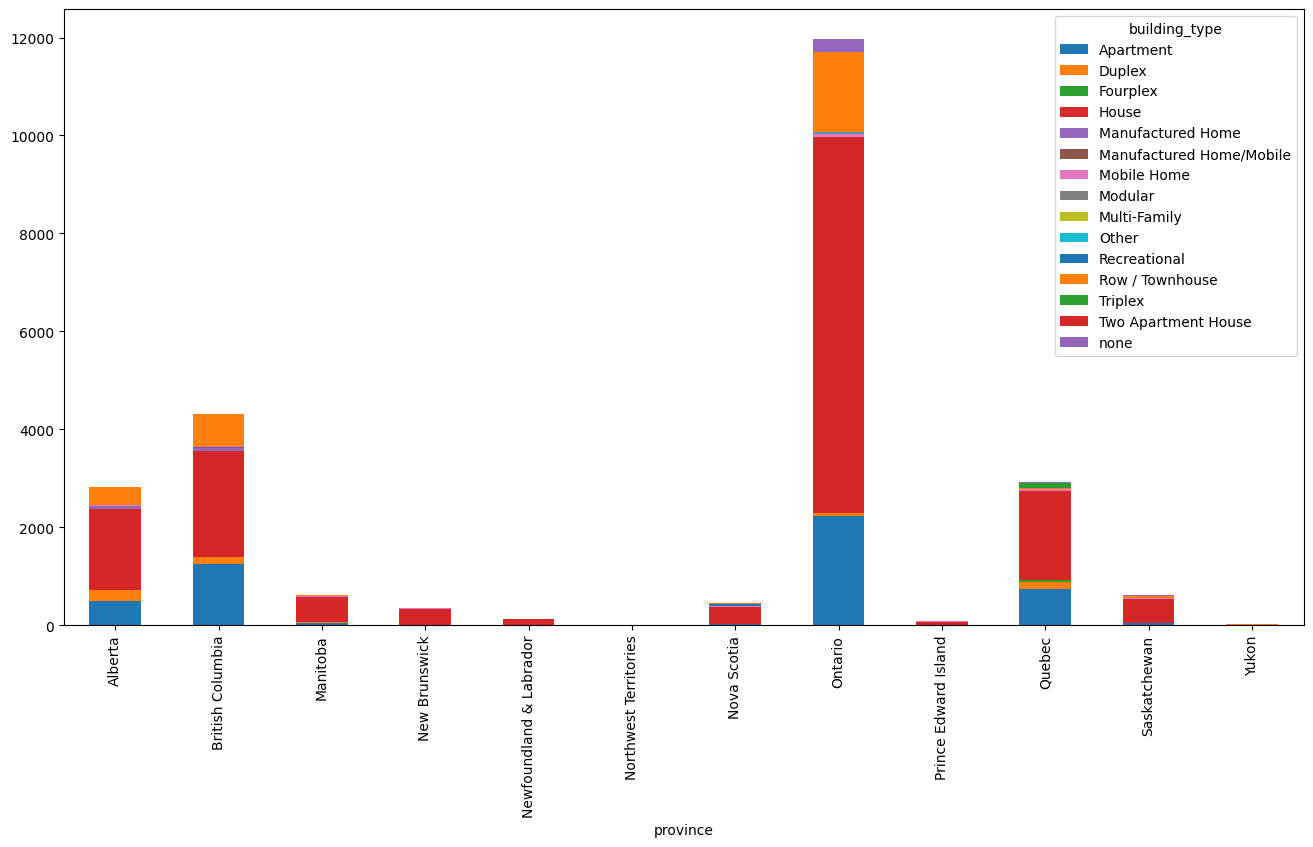

In [36]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

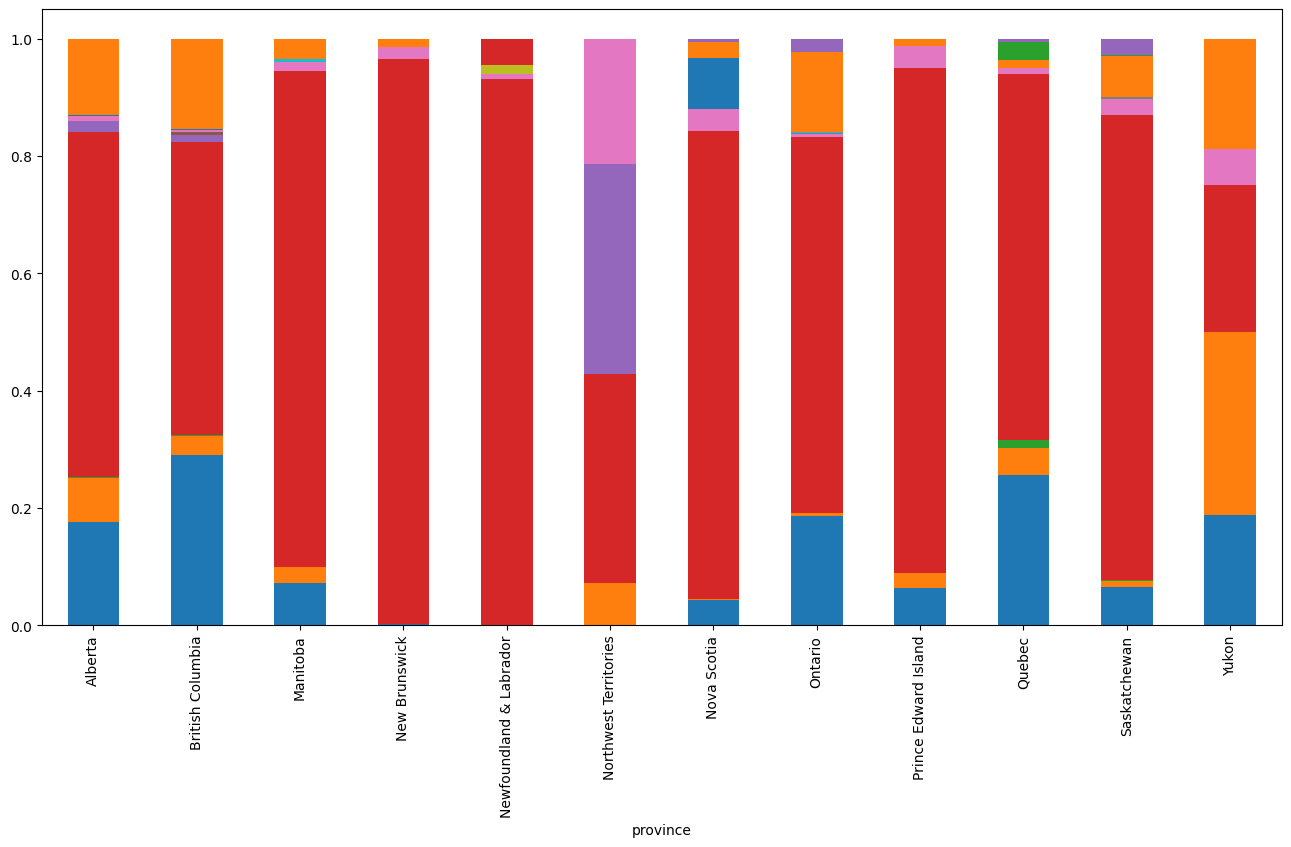

In [37]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [38]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,884,0,1805,0,22,0,0,1,0,0,0,0,0,0,116
British Columbia,0,53,0,2113,0,70,52,33,0,6,10,1962,2,0,6,16
Manitoba,0,0,0,542,70,7,0,0,1,0,0,0,0,0,0,0
New Brunswick,0,7,0,258,0,7,0,0,0,0,0,0,0,0,0,79
Newfoundland & Labrador,0,0,0,129,0,0,0,0,0,0,0,0,0,0,0,2
Northwest Territories,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,12
Nova Scotia,0,28,0,410,0,7,0,0,0,0,0,0,3,0,1,0
Ontario,535,2497,5,8419,0,61,10,0,1,5,9,0,4,4,0,429
Prince Edward Island,0,5,0,72,0,1,0,0,0,0,0,0,0,0,1,0


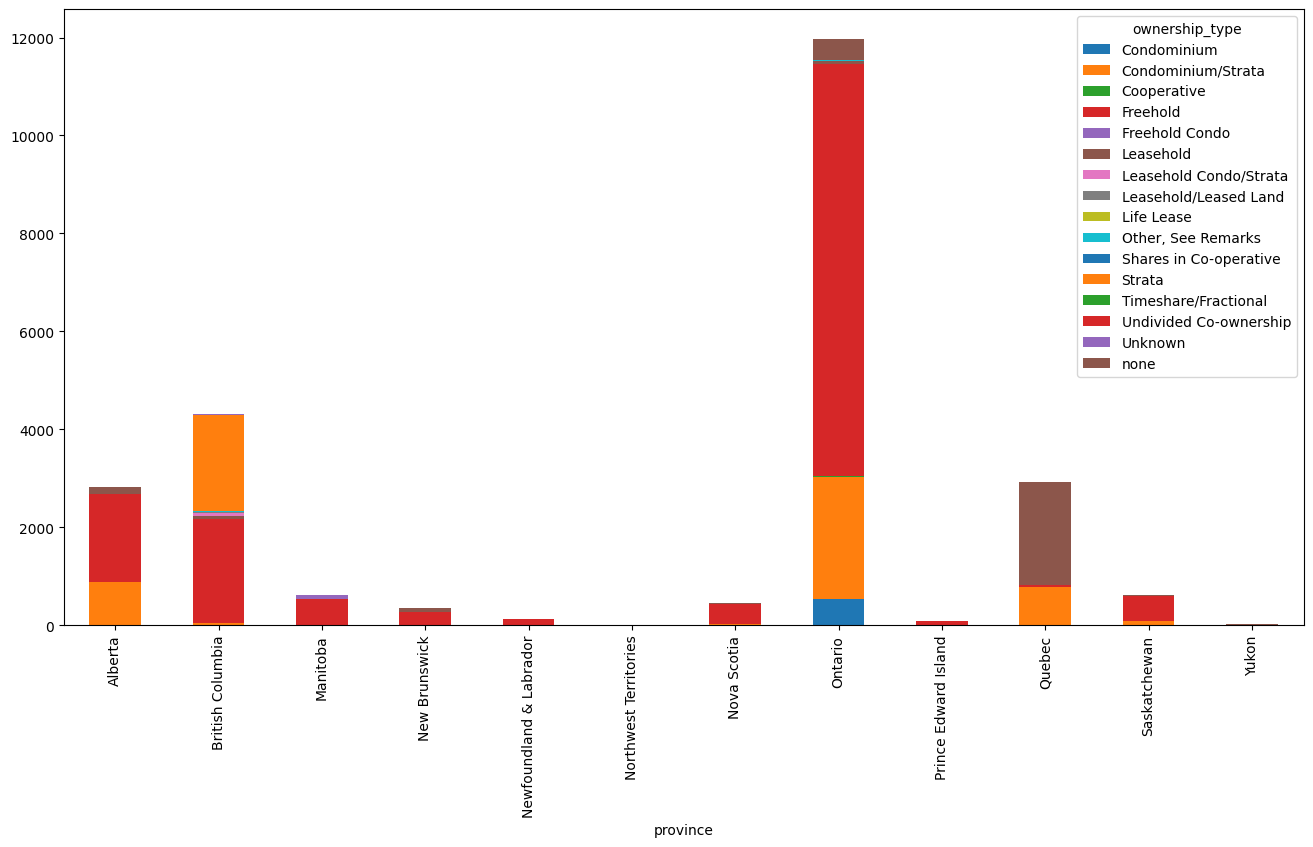

In [39]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

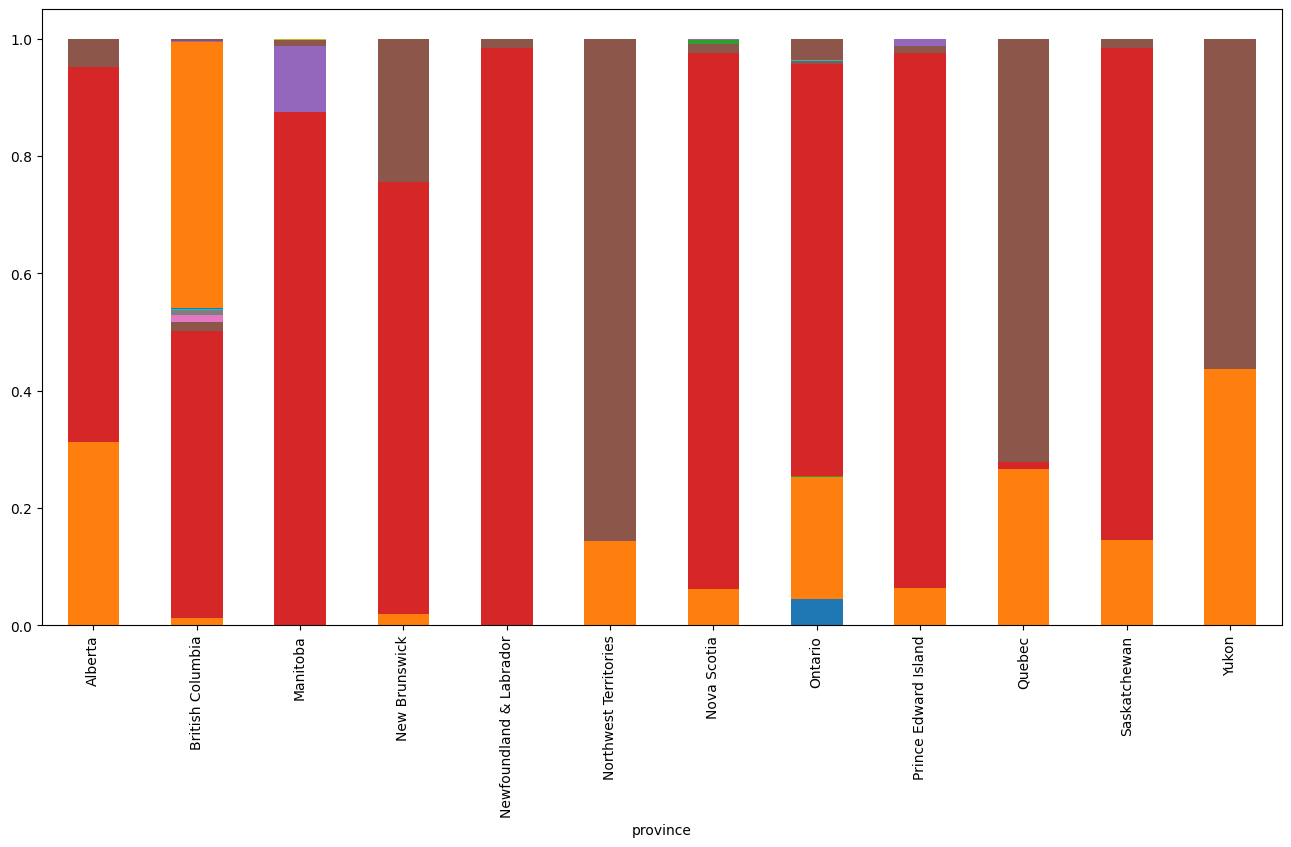

In [40]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [41]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        3173
Strata                    1161
Condominium                327
Leasehold Condo/Strata      45
Freehold Condo              44
Undivided Co-ownership      42
Freehold                    16
Shares in Co-operative      16
Leasehold                    5
none                         4
Leasehold/Leased Land        4
Cooperative                  2
Other, See Remarks           2
Life Lease                   2
Timeshare/Fractional         1
Name: count, dtype: int64

In [42]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold                 240
none                     181
Strata                    92
Condominium/Strata        57
Leasehold                  4
Unknown                    1
Leasehold/Leased Land      1
Name: count, dtype: int64

In [43]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,
Condominium,327,0,0,12,0,0,0,0,0,0,0,194,0,0,2
Condominium/Strata,3173,57,0,80,6,0,2,0,0,3,1,993,2,0,31
Cooperative,2,0,0,1,0,0,1,1,0,0,0,0,0,0,0
Freehold,16,240,5,12848,48,13,44,6,2,2,42,953,4,6,30
Freehold Condo,44,0,0,7,0,0,0,0,0,2,0,17,0,0,0
Leasehold,5,4,0,57,27,8,61,16,0,0,2,0,0,0,5
Leasehold Condo/Strata,45,0,0,0,0,1,0,0,0,0,1,14,0,0,1
Leasehold/Leased Land,4,1,0,21,3,0,0,0,0,0,0,4,0,0,0
Life Lease,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0


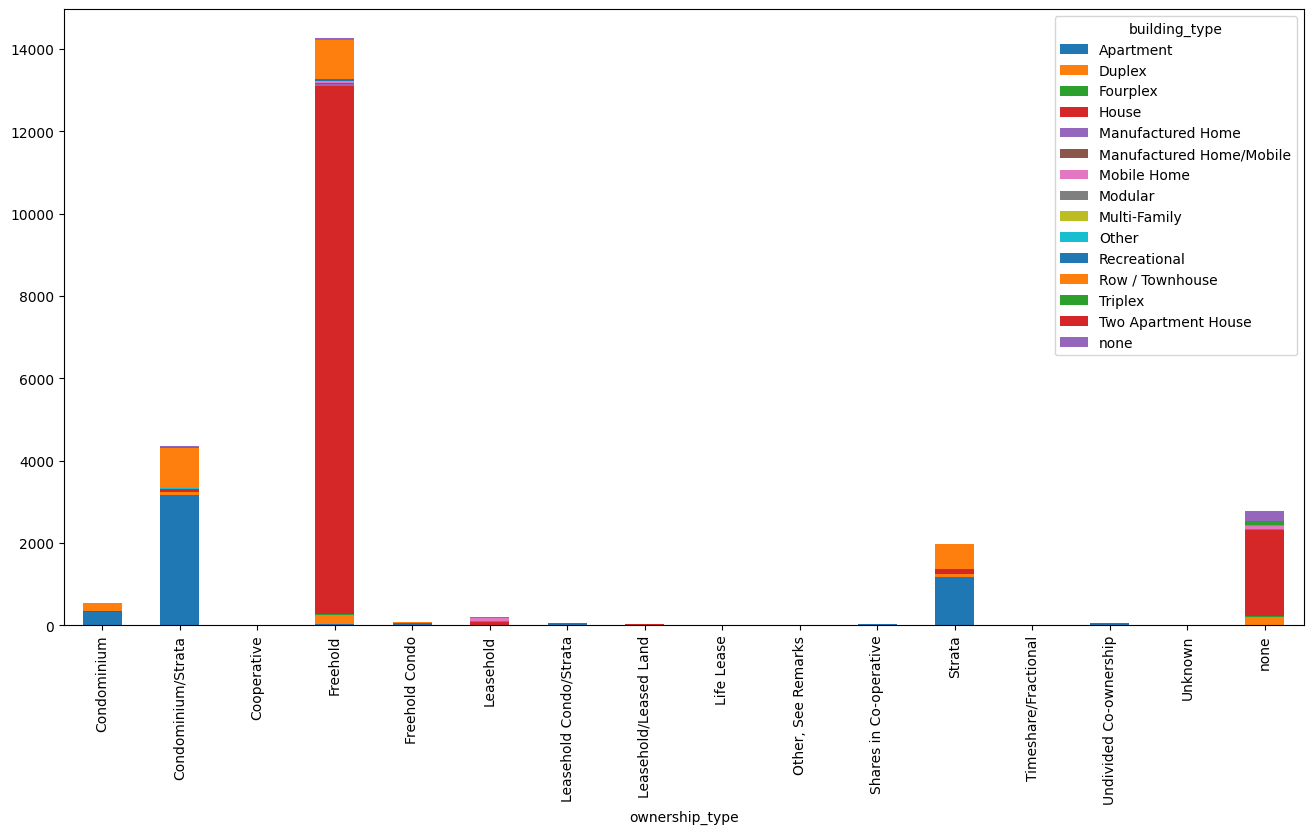

In [44]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

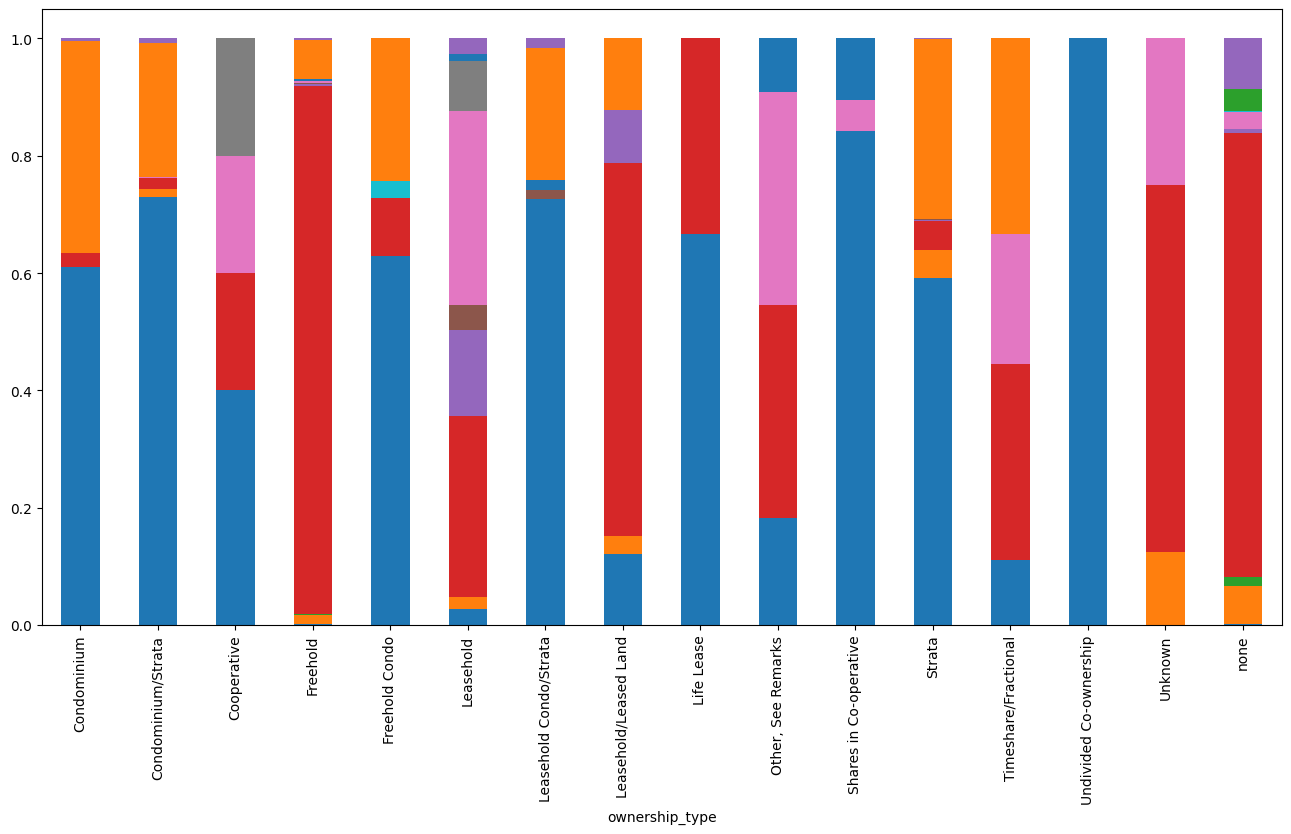

In [45]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [46]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,576.0,576.0,352.0,576.0,576.0,576.0,5.760000e+02,576.0
mean,27033828.0,3.0,2.0,-103.0,49.0,2.0,6.385385e+17,789576.0
std,9762.0,1.0,1.0,20.0,4.0,2.0,1.418452e+12,679968.0
min,27015633.0,0.0,1.0,-135.0,42.0,0.0,6.385355e+17,99900.0
25%,27025492.0,2.0,2.0,-119.0,46.0,0.0,6.385373e+17,418750.0
50%,27034422.0,3.0,2.0,-114.0,50.0,2.0,6.385385e+17,575000.0
75%,27042471.0,3.0,2.0,-79.0,51.0,3.0,6.385398e+17,899900.0
max,27049893.0,6.0,3.0,-64.0,72.0,11.0,6.385422e+17,8850000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,110.0,110.0,55.0,110.0,110.0,110.0,1.100000e+02,110.0
mean,27033532.0,2.0,2.0,-76.0,46.0,3.0,6.385384e+17,823701.0
std,9783.0,1.0,0.0,9.0,2.0,3.0,1.403567e+12,462008.0
min,27015659.0,0.0,1.0,-118.0,43.0,0.0,6.385355e+17,182000.0
25%,27026747.0,1.0,2.0,-76.0,45.0,0.0,6.385374e+17,538500.0
50%,27033353.0,1.0,2.0,-74.0,46.0,3.0,6.385383e+17,759000.0
75%,27042282.0,2.0,3.0,-73.0,46.0,5.0,6.385398e+17,963275.0
max,27049846.0,9.0,3.0,-71.0,54.0,16.0,6.385420e+17,2800000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,49.0,49.0,22.0,49.0,49.0,49.0,4.900000e+01,49.0
mean,27035176.0,2.0,2.0,-78.0,46.0,4.0,6.385387e+17,851781.0
std,10528.0,2.0,1.0,13.0,2.0,4.0,1.618354e+12,471878.0
min,27015815.0,0.0,1.0,-125.0,42.0,0.0,6.385356e+17,199000.0
25%,27027916.0,1.0,2.0,-76.0,45.0,0.0,6.385375e+17,519000.0
50%,27035716.0,1.0,2.0,-74.0,46.0,4.0,6.385389e+17,775000.0
75%,27044600.0,2.0,2.0,-73.0,46.0,6.0,6.385399e+17,1049900.0
max,27049875.0,8.0,3.0,-69.0,54.0,21.0,6.385420e+17,2399000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2782.0,2782.0,2029.0,2782.0,2782.0,2782.0,2.782000e+03,2782.0
mean,27033261.0,3.0,2.0,-95.0,46.0,2.0,6.385384e+17,776539.0
std,9621.0,1.0,1.0,20.0,3.0,4.0,1.396956e+12,379881.0
min,27015654.0,0.0,1.0,-135.0,42.0,0.0,6.385355e+17,59000.0
25%,27025105.0,2.0,2.0,-114.0,44.0,1.0,6.385373e+17,549000.0
50%,27033306.0,3.0,2.0,-80.0,44.0,2.0,6.385383e+17,718000.0
75%,27041383.0,3.0,3.0,-79.0,49.0,2.0,6.385396e+17,937175.0
max,27050041.0,8.0,5.0,-63.0,61.0,219.0,6.385422e+17,4485000.0


In [50]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       15231
Apartment                    4844
Row / Townhouse              2782
Semi-Detached                 735
none                          308
Mobile Home                   196
Manufactured Home             107
Recreational                   49
Manufactured Home/Mobile       24
Modular                        23
Other                          10
Two Apartment House             6
Multi-Family                    2
Name: count, dtype: int64

In [51]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              15231
Apartment           4844
Row / Townhouse     2782
Semi-Detached        735
Name: count, dtype: int64

In [52]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23592 entries, 1 to 26631
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23592 non-null  int64  
 1   id_mls                    23592 non-null  object 
 2   bathrooms_total           23592 non-null  int64  
 3   bedrooms                  23592 non-null  object 
 4   stories_total             16603 non-null  float64
 5   size_interior             13099 non-null  object 
 6   building_type             23592 non-null  object 
 7   agency_name               23592 non-null  object 
 8   agency_type               23592 non-null  object 
 9   property_type             23592 non-null  object 
 10  lng                       23592 non-null  float64
 11  lat                       23592 non-null  float64
 12  ownership_type            23592 non-null  object 
 13  ownership_type_group_ids  23592 non-null  object 
 14  land_size  

In [53]:
df_bt["province"].value_counts()

province
Ontario                    11618
British Columbia            4223
Quebec                      2868
Alberta                     2748
Manitoba                     608
Saskatchewan                 574
Nova Scotia                  390
New Brunswick                344
Newfoundland & Labrador      122
Prince Edward Island          76
Yukon                         15
Northwest Territories          6
Name: count, dtype: int64

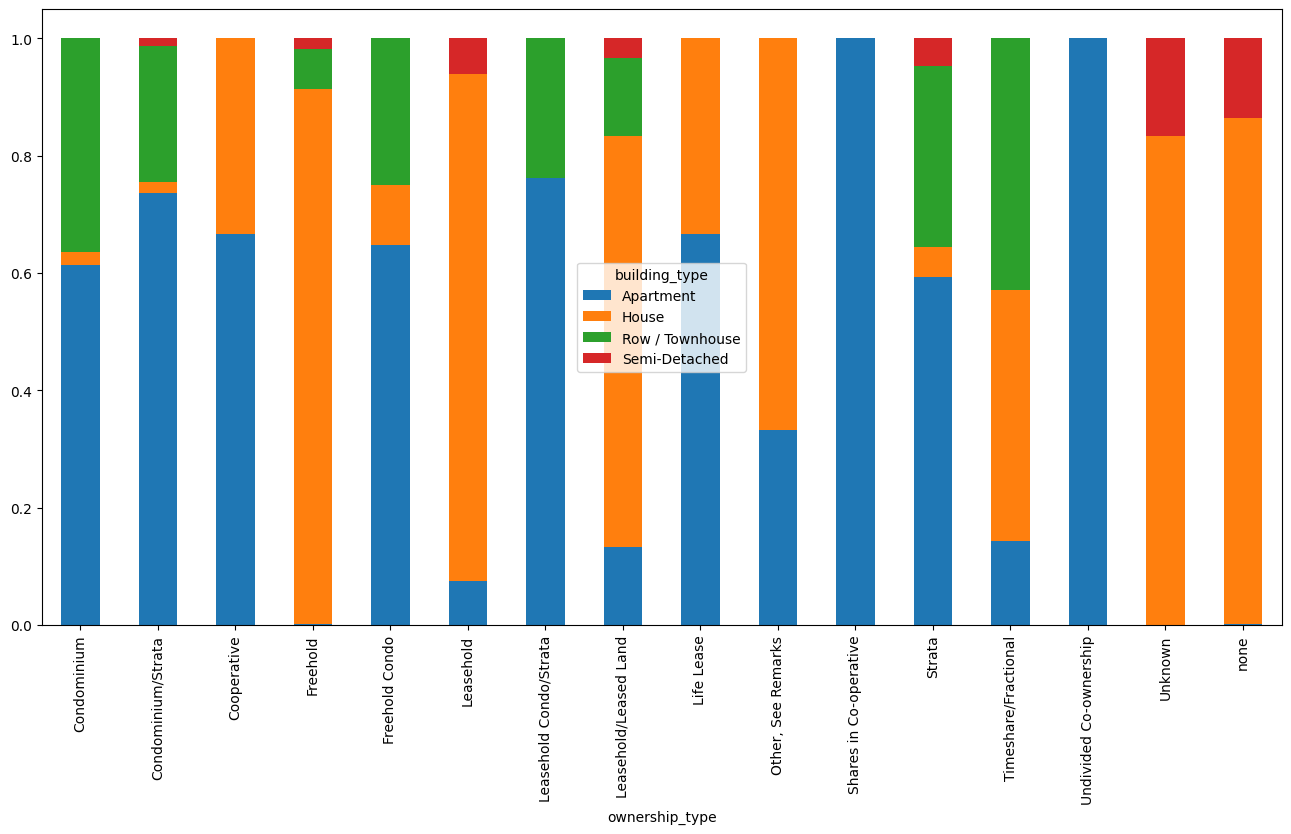

In [54]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [55]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          14066
2           6935
none        2437
4             96
1 2           42
3              7
1 2 3 4        6
2 3            3
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12848
none        2098
2            198
4             78
1 2 3 4        5
3              3
2 3            1
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       4766
1 2       42
1         16
4          9
none       8
2 3        2
3          1
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none       329
1          249
2          151
4            5
1 2 3 4      1
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1820
1        953
4          4
3          3
none       2
Name: count, dtype: int64

In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,14066.0,14066.0,11346.0,14066.0,14066.0,14066.0,1.406600e+04,14066.0
mean,27033020.0,3.0,2.0,-91.0,46.0,3.0,6.385384e+17,1072229.0
std,9691.0,1.0,1.0,19.0,4.0,4.0,1.411306e+12,1023763.0
min,27015632.0,0.0,1.0,-134.0,42.0,0.0,6.385355e+17,1.0
25%,27024732.0,2.0,1.0,-113.0,44.0,0.0,6.385372e+17,569000.0
50%,27033244.0,3.0,2.0,-80.0,45.0,3.0,6.385383e+17,829999.0
75%,27041426.0,4.0,2.0,-79.0,49.0,5.0,6.385396e+17,1288000.0
max,27050042.0,13.0,5.0,-53.0,72.0,100.0,6.385422e+17,29800000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2437.0,2437.0,2194.0,2437.0,2437.0,2437.0,2.437000e+03,2437.0
mean,27033881.0,2.0,2.0,-76.0,46.0,4.0,6.385385e+17,663261.0
std,10184.0,1.0,1.0,10.0,2.0,4.0,1.537596e+12,577832.0
min,27015641.0,0.0,1.0,-135.0,42.0,0.0,6.385355e+17,38000.0
25%,27025457.0,1.0,1.0,-74.0,45.0,2.0,6.385373e+17,365000.0
50%,27034386.0,2.0,2.0,-74.0,46.0,4.0,6.385384e+17,539000.0
75%,27042383.0,2.0,2.0,-72.0,46.0,6.0,6.385398e+17,779800.0
max,27050036.0,8.0,3.0,-54.0,62.0,46.0,6.385422e+17,8500000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,7.0,7.0,5.0,7.0,7.0,7.0,7.000000e+00,7.0
mean,27025669.0,2.0,2.0,-85.0,46.0,0.0,6.385374e+17,493000.0
std,5200.0,1.0,0.0,28.0,2.0,1.0,8.164818e+11,475441.0
min,27020914.0,1.0,1.0,-125.0,45.0,0.0,6.385365e+17,59000.0
25%,27022175.0,2.0,2.0,-102.0,45.0,0.0,6.385369e+17,172500.0
50%,27023292.0,2.0,2.0,-80.0,45.0,0.0,6.385372e+17,399000.0
75%,27027932.0,3.0,2.0,-63.0,47.0,0.0,6.385377e+17,599000.0
max,27035265.0,4.0,2.0,-61.0,49.0,2.0,6.385388e+17,1450000.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,96.0,96.0,71.0,96.0,96.0,96.0,9.600000e+01,96.0
mean,27033921.0,2.0,1.0,-108.0,49.0,2.0,6.385384e+17,732762.0
std,9615.0,1.0,1.0,19.0,3.0,3.0,1.352531e+12,561838.0
min,27015773.0,1.0,1.0,-125.0,43.0,0.0,6.385355e+17,62500.0
25%,27026072.0,1.0,1.0,-120.0,48.0,0.0,6.385373e+17,387750.0
50%,27034219.0,2.0,1.0,-120.0,49.0,0.0,6.385384e+17,634950.0
75%,27041573.0,3.0,2.0,-92.0,50.0,3.0,6.385397e+17,912975.0
max,27048424.0,4.0,4.0,-63.0,56.0,18.0,6.385408e+17,3280000.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,6.0,6.0,3.0,6.0,6.0,6.0,6.000000e+00,6.0
mean,27035946.0,2.0,1.0,-123.0,49.0,0.0,6.385387e+17,833300.0
std,8513.0,1.0,1.0,1.0,0.0,0.0,1.183840e+12,560085.0
min,27026102.0,1.0,1.0,-124.0,49.0,0.0,6.385373e+17,239000.0
25%,27029064.0,1.0,1.0,-123.0,49.0,0.0,6.385377e+17,438675.0
50%,27035457.0,1.0,1.0,-123.0,49.0,0.0,6.385386e+17,814950.0
75%,27042444.0,2.0,2.0,-122.0,49.0,0.0,6.385396e+17,968475.0
max,27046953.0,3.0,2.0,-122.0,50.0,0.0,6.385401e+17,1798000.0


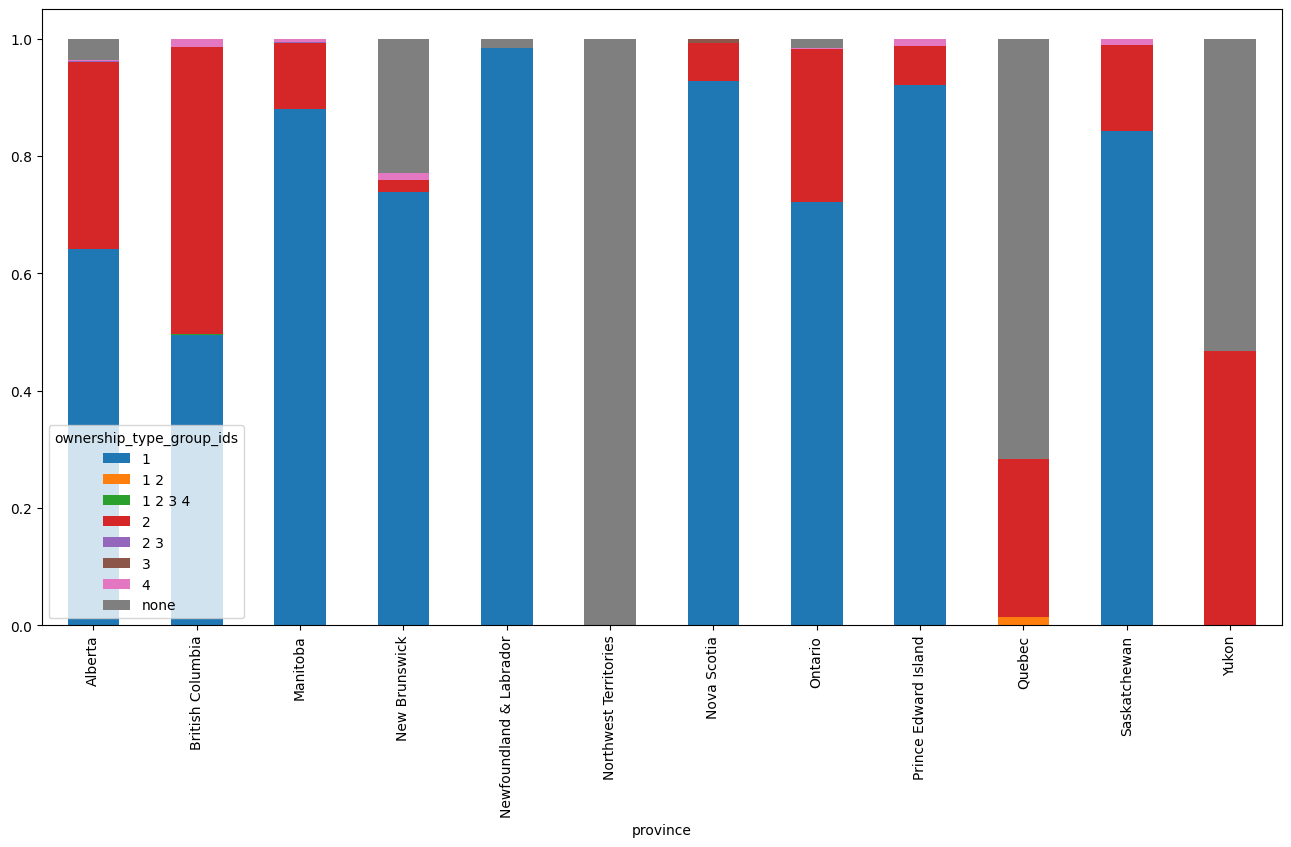

In [65]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [66]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          14066
2           6935
none        2437
4             96
1 2           42
3              7
1 2 3 4        6
2 3            3
Name: count, dtype: int64

In [67]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

/tmp/ipykernel_8335/3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    14066
2     6935
Name: count, dtype: int64

In [68]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21001 entries, 1 to 26631
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21001 non-null  int64  
 1   id_mls                    21001 non-null  object 
 2   bathrooms_total           21001 non-null  int64  
 3   bedrooms                  21001 non-null  object 
 4   stories_total             14293 non-null  float64
 5   size_interior             12040 non-null  object 
 6   building_type             21001 non-null  object 
 7   agency_name               21001 non-null  object 
 8   agency_type               21001 non-null  object 
 9   property_type             21001 non-null  object 
 10  lng                       21001 non-null  float64
 11  lat                       21001 non-null  float64
 12  ownership_type            21001 non-null  object 
 13  ownership_type_group_ids  21001 non-null  int64  
 14  land_size  

In [69]:
df_oti_new["province"].value_counts()

province
Ontario                    11410
British Columbia            4154
Alberta                     2640
Quebec                       776
Manitoba                     603
Saskatchewan                 568
Nova Scotia                  387
New Brunswick                261
Newfoundland & Labrador      120
Prince Edward Island          75
Yukon                          7
Name: count, dtype: int64

In [70]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [71]:
df = df_oti_new

In [72]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_8335/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    11773
True      9228
Name: count, dtype: int64

In [73]:
df.shape

(21001, 21)

In [74]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_8335/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,27049784,24013752,2,2 + 0,1.0,1545.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.131907,Freehold,1,53.54X132.68 ft,0,https://realtor.ca/real-estate/27049784/236-mc...,638541963623700000,N9V3Y7,Ontario,739900.0
2,27047465,24013917,2,4 + 3,1.0,NaN,House,KELLER WILLIAMS LIFESTYLES REALTY,Firm,Single Family,...,42.308264,Freehold,1,33X102 FT,0,https://realtor.ca/real-estate/27047465/445-br...,638540500723000000,N9B2M3,Ontario,399900.0
4,27045805,X8443402,2,3 + 2,1.0,NaN,House,HOMELIFE/MIRACLE REALTY LTD,Firm,Single Family,...,42.265735,Freehold,1,60 x 111 M|under 1/2 acre,3,https://realtor.ca/real-estate/27045805/3190-m...,638539979043000000,N9E2T9,Ontario,499000.0
5,27045371,24013861,1,2 + 0,1.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.255718,Freehold,1,216Xirreg,0,https://realtor.ca/real-estate/27045371/2043-l...,638539960644800000,N9E3S4,Ontario,549900.0
6,27045370,24013905,3,5 + 2,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,Single Family,...,42.274765,Freehold,1,100.4X106.92,0,https://realtor.ca/real-estate/27045370/2405-r...,638539960632830000,NaN,Ontario,999900.0


In [75]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_8335/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [76]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [77]:
pd.DataFrame(bed_extra).value_counts()

0
0    3849
1    3629
2    1446
3     267
4      35
5       2
Name: count, dtype: int64

In [78]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [79]:
len(bedrooms_extra)

21001

In [80]:
bedrooms_extra[:20]

['0',
 '3',
 '2',
 '0',
 '2',
 '0',
 '1',
 '2',
 '0',
 '3',
 '1',
 '0',
 '2',
 '1',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0']

In [81]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [82]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,27049784,24013752,0,2,2 + 0,1.00,1545.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.131907,Freehold,1,53.54X132.68 ft,0,https://realtor.ca/real-estate/27049784/236-mc...,638541963623700000,N9V3Y7,Ontario,739900.0
2,27047465,24013917,3,2,4 + 3,1.00,NaN,House,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.308264,Freehold,1,33X102 FT,0,https://realtor.ca/real-estate/27047465/445-br...,638540500723000000,N9B2M3,Ontario,399900.0
4,27045805,X8443402,2,2,3 + 2,1.00,NaN,House,HOMELIFE/MIRACLE REALTY LTD,Firm,...,42.265735,Freehold,1,60 x 111 M|under 1/2 acre,3,https://realtor.ca/real-estate/27045805/3190-m...,638539979043000000,N9E2T9,Ontario,499000.0
5,27045371,24013861,0,1,2 + 0,1.00,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.255718,Freehold,1,216Xirreg,0,https://realtor.ca/real-estate/27045371/2043-l...,638539960644800000,N9E3S4,Ontario,549900.0
6,27045370,24013905,2,3,5 + 2,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.274765,Freehold,1,100.4X106.92,0,https://realtor.ca/real-estate/27045370/2405-r...,638539960632830000,NaN,Ontario,999900.0
7,27045110,24013870,0,2,2 + 0,NaN,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.319683,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27045110/75-riv...,638539924842400000,N9A7C4,Ontario,2880.0
8,27045108,24013894,1,2,3 + 1,2.00,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.294769,Freehold,1,25.36X100.02,0,https://realtor.ca/real-estate/27045108/361-so...,638539924816930000,N9C2W4,Ontario,399900.0
9,27045107,24013895,2,3,4 + 2,1.75,NaN,House,JUMP REALTY INC.,Firm,...,42.307488,Freehold,1,39.99X114.33 FT,0,https://realtor.ca/real-estate/27045107/496-pa...,638539924815100000,N9B2N5,Ontario,449900.0
10,27045105,24013900,0,1,1 + 0,NaN,NaN,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.220837,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27045105/7333-m...,638539924810400000,N9H0A8,Ontario,424900.0
11,27044439,24013880,3,5,4 + 3,NaN,2150.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.273350,Freehold,1,50X114,0,https://realtor.ca/real-estate/27044439/2499-r...,638539888870200000,N9E0A9,Ontario,1099999.0


In [83]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_8335/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21001 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21001 non-null  int64  
 1   id_mls                    21001 non-null  object 
 2   bedrooms_extra            21001 non-null  object 
 3   bathrooms_total           21001 non-null  int64  
 4   bedrooms                  21001 non-null  object 
 5   stories_total             14293 non-null  float64
 6   size_interior             12040 non-null  object 
 7   building_type             21001 non-null  object 
 8   agency_name               21001 non-null  object 
 9   agency_type               21001 non-null  object 
 10  property_type             21001 non-null  object 
 11  lng                       21001 non-null  float64
 12  lat                       21001 non-null  float64
 13  ownership_type            21001 non-null  object 
 14  ownership_t

In [85]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_8335/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [86]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,27049784,24013752,0,2,2,1.00,1545.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.131907,Freehold,1,53.54X132.68 ft,0,https://realtor.ca/real-estate/27049784/236-mc...,638541963623700000,N9V3Y7,Ontario,739900.0
2,27047465,24013917,3,2,4,1.00,NaN,House,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.308264,Freehold,1,33X102 FT,0,https://realtor.ca/real-estate/27047465/445-br...,638540500723000000,N9B2M3,Ontario,399900.0
4,27045805,X8443402,2,2,3,1.00,NaN,House,HOMELIFE/MIRACLE REALTY LTD,Firm,...,42.265735,Freehold,1,60 x 111 M|under 1/2 acre,3,https://realtor.ca/real-estate/27045805/3190-m...,638539979043000000,N9E2T9,Ontario,499000.0
5,27045371,24013861,0,1,2,1.00,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.255718,Freehold,1,216Xirreg,0,https://realtor.ca/real-estate/27045371/2043-l...,638539960644800000,N9E3S4,Ontario,549900.0
6,27045370,24013905,2,3,5,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.274765,Freehold,1,100.4X106.92,0,https://realtor.ca/real-estate/27045370/2405-r...,638539960632830000,NaN,Ontario,999900.0
7,27045110,24013870,0,2,2,NaN,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.319683,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27045110/75-riv...,638539924842400000,N9A7C4,Ontario,2880.0
8,27045108,24013894,1,2,3,2.00,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.294769,Freehold,1,25.36X100.02,0,https://realtor.ca/real-estate/27045108/361-so...,638539924816930000,N9C2W4,Ontario,399900.0
9,27045107,24013895,2,3,4,1.75,NaN,House,JUMP REALTY INC.,Firm,...,42.307488,Freehold,1,39.99X114.33 FT,0,https://realtor.ca/real-estate/27045107/496-pa...,638539924815100000,N9B2N5,Ontario,449900.0
10,27045105,24013900,0,1,1,NaN,NaN,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.220837,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27045105/7333-m...,638539924810400000,N9H0A8,Ontario,424900.0
11,27044439,24013880,3,5,4,NaN,2150.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.273350,Freehold,1,50X114,0,https://realtor.ca/real-estate/27044439/2499-r...,638539888870200000,N9E0A9,Ontario,1099999.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21001 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21001 non-null  int64  
 1   id_mls                    21001 non-null  object 
 2   bedrooms_extra            21001 non-null  int64  
 3   bathrooms_total           21001 non-null  int64  
 4   bedrooms                  21001 non-null  int64  
 5   stories_total             14293 non-null  float64
 6   size_interior             12040 non-null  object 
 7   building_type             21001 non-null  object 
 8   agency_name               21001 non-null  object 
 9   agency_type               21001 non-null  object 
 10  property_type             21001 non-null  object 
 11  lng                       21001 non-null  float64
 12  lat                       21001 non-null  float64
 13  ownership_type            21001 non-null  object 
 14  ownership_t

In [88]:
df["province"].value_counts()

province
Ontario                    11410
British Columbia            4154
Alberta                     2640
Quebec                       776
Manitoba                     603
Saskatchewan                 568
Nova Scotia                  387
New Brunswick                261
Newfoundland & Labrador      120
Prince Edward Island          75
Yukon                          7
Name: count, dtype: int64

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21001 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21001 non-null  int64  
 1   id_mls                    21001 non-null  object 
 2   bedrooms_extra            21001 non-null  int64  
 3   bathrooms_total           21001 non-null  int64  
 4   bedrooms                  21001 non-null  int64  
 5   stories_total             14293 non-null  float64
 6   size_interior             12040 non-null  object 
 7   building_type             21001 non-null  object 
 8   agency_name               21001 non-null  object 
 9   agency_type               21001 non-null  object 
 10  property_type             21001 non-null  object 
 11  lng                       21001 non-null  float64
 12  lat                       21001 non-null  float64
 13  ownership_type            21001 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,27049784,24013752,0,2,2,1.0,1545.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.131907,Freehold,1,53.54X132.68 ft,0,https://realtor.ca/real-estate/27049784/236-mc...,638541963623700000,N9V3Y7,Ontario,739900.0
2,27047465,24013917,3,2,4,1.0,NaN,House,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.308264,Freehold,1,33X102 FT,0,https://realtor.ca/real-estate/27047465/445-br...,638540500723000000,N9B2M3,Ontario,399900.0
4,27045805,X8443402,2,2,3,1.0,NaN,House,HOMELIFE/MIRACLE REALTY LTD,Firm,...,42.265735,Freehold,1,60 x 111 M|under 1/2 acre,3,https://realtor.ca/real-estate/27045805/3190-m...,638539979043000000,N9E2T9,Ontario,499000.0
5,27045371,24013861,0,1,2,1.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.255718,Freehold,1,216Xirreg,0,https://realtor.ca/real-estate/27045371/2043-l...,638539960644800000,N9E3S4,Ontario,549900.0
6,27045370,24013905,2,3,5,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.274765,Freehold,1,100.4X106.92,0,https://realtor.ca/real-estate/27045370/2405-r...,638539960632830000,NaN,Ontario,999900.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00      5027
1.50       577
1.75        36
2.00      6570
2.50       147
3.00      1189
3.50         1
4.00       317
5.00        48
6.00        94
7.00        20
8.00        36
9.00        15
10.00       16
11.00        4
12.00       19
13.00        6
14.00        9
15.00       15
16.00       11
17.00        6
18.00        5
19.00        8
20.00        6
21.00        9
22.00        4
23.00        6
24.00        8
25.00        7
26.00        7
27.00        2
28.00        3
29.00        3
30.00        7
31.00        5
32.00        3
33.00        2
34.00        2
35.00        2
36.00        6
38.00       11
39.00        2
40.00        1
41.00        1
42.00        1
44.00        3
45.00        1
47.00        1
48.00        1
50.00        1
51.00        2
52.00        1
53.00        1
55.00        3
57.00        1
83.00        1
90.00        1
130.00       1
286.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     5027
1.50      577
1.75       36
2.00     6570
2.50      147
3.00     1189
3.50        1
4.00      317
5.00       48
6.00       94
7.00       20
8.00       36
9.00       15
10.00      16
11.00       4
12.00      19
13.00       6
14.00       9
15.00      15
16.00      11
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [95]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          3100
House              2712
Row / Townhouse     752
Semi-Detached       144
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

6        https://realtor.ca/real-estate/27045370/2405-r...
7        https://realtor.ca/real-estate/27045110/75-riv...
10       https://realtor.ca/real-estate/27045105/7333-m...
11       https://realtor.ca/real-estate/27044439/2499-r...
16       https://realtor.ca/real-estate/27043254/168-la...
                               ...                        
26606    https://realtor.ca/real-estate/27028591/117-25...
26607    https://realtor.ca/real-estate/27028593/118-25...
26608    https://realtor.ca/real-estate/27028087/18-75-...
26609    https://realtor.ca/real-estate/27027232/a-11-d...
26613    https://realtor.ca/real-estate/27022242/10-65-...
Name: page_url, Length: 6708, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21001 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21001 non-null  int64  
 1   id_mls                    21001 non-null  object 
 2   bedrooms_extra            21001 non-null  int64  
 3   bathrooms_total           21001 non-null  int64  
 4   bedrooms                  21001 non-null  int64  
 5   stories_total             21001 non-null  float64
 6   size_interior             12040 non-null  object 
 7   building_type             21001 non-null  object 
 8   agency_name               21001 non-null  object 
 9   agency_type               21001 non-null  object 
 10  property_type             21001 non-null  object 
 11  lng                       21001 non-null  float64
 12  lat                       21001 non-null  float64
 13  ownership_type            21001 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     11735
2.00      6570
3.00      1189
1.50       577
4.00       317
2.50       147
6.00        94
5.00        48
1.75        36
8.00        36
7.00        20
12.00       19
10.00       16
9.00        15
15.00       15
38.00       11
16.00       11
21.00        9
14.00        9
24.00        8
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

86       https://realtor.ca/real-estate/27025057/560-ch...
128      https://realtor.ca/real-estate/27016905/528-ca...
271      https://realtor.ca/real-estate/27031236/204-ro...
423      https://realtor.ca/real-estate/27017099/10960-...
466      https://realtor.ca/real-estate/27048507/3-2835...
                               ...                        
26401    https://realtor.ca/real-estate/27031410/1632-8...
26509    https://realtor.ca/real-estate/27038262/10928-...
26514    https://realtor.ca/real-estate/27033504/12508-...
26542    https://realtor.ca/real-estate/27049462/303-80...
26546    https://realtor.ca/real-estate/27044634/46-400...
Name: page_url, Length: 1189, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  572
Alberta                 322
British Columbia        172
Ontario                  87
Prince Edward Island      3
Nova Scotia               1
Saskatchewan              1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

722      https://realtor.ca/real-estate/27024362/114-20...
735      https://realtor.ca/real-estate/27023281/106-20...
837      https://realtor.ca/real-estate/27046751/360-qu...
1097     https://realtor.ca/real-estate/27025042/340-pr...
1253     https://realtor.ca/real-estate/27040292/208-35...
                               ...                        
26557    https://realtor.ca/real-estate/27039219/1108-1...
26562    https://realtor.ca/real-estate/27035825/006-9-...
26565    https://realtor.ca/real-estate/27034561/2615-1...
26566    https://realtor.ca/real-estate/27034549/107-11...
26581    https://realtor.ca/real-estate/27020173/2209-1...
Name: page_url, Length: 1158, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

1        False
2        False
4        False
5        False
6        False
         ...  
26607    False
26608    False
26609    False
26613    False
26631    False
Length: 21001, dtype: bool

In [104]:
~mask_apt_storey

1        True
2        True
4        True
5        True
6        True
         ... 
26607    True
26608    True
26609    True
26613    True
26631    True
Length: 21001, dtype: bool

In [105]:
df_storey[mask_apt_storey].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1158 entries, 722 to 26581
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1158 non-null   int64  
 1   id_mls                    1158 non-null   object 
 2   bedrooms_extra            1158 non-null   int64  
 3   bathrooms_total           1158 non-null   int64  
 4   bedrooms                  1158 non-null   int64  
 5   stories_total             1158 non-null   float64
 6   size_interior             1072 non-null   object 
 7   building_type             1158 non-null   object 
 8   agency_name               1158 non-null   object 
 9   agency_type               1158 non-null   object 
 10  property_type             1158 non-null   object 
 11  lng                       1158 non-null   float64
 12  lat                       1158 non-null   float64
 13  ownership_type            1158 non-null   object 
 14  ownership_

In [106]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# # set storeys for all appartments to 1
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00    11735
2.00     6443
3.00      890
1.50      577
2.50      147
1.75       36
4.00       13
5.00        1
3.50        1
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([1.  , 2.  , 1.75, 1.5 , 2.5 , 3.  , 4.  , 5.  , 3.5 ])

In [110]:
df = df_storey

In [111]:
df["province"].value_counts()

province
Ontario                    11323
British Columbia            3982
Alberta                     2318
Manitoba                     603
Saskatchewan                 567
Nova Scotia                  386
New Brunswick                261
Quebec                       204
Newfoundland & Labrador      120
Prince Edward Island          72
Yukon                          7
Name: count, dtype: int64

## Handling Interior Size (Phase 1)

### First Looks

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19843 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19843 non-null  int64  
 1   id_mls                    19843 non-null  object 
 2   bedrooms_extra            19843 non-null  int64  
 3   bathrooms_total           19843 non-null  int64  
 4   bedrooms                  19843 non-null  int64  
 5   stories_total             19843 non-null  float64
 6   size_interior             10968 non-null  object 
 7   building_type             19843 non-null  object 
 8   agency_name               19843 non-null  object 
 9   agency_type               19843 non-null  object 
 10  property_type             19843 non-null  object 
 11  lng                       19843 non-null  float64
 12  lat                       19843 non-null  float64
 13  ownership_type            19843 non-null  object 
 14  ownership_t

In [113]:
df["size_interior"].value_counts()

size_interior
1100.0000       30
960 sqft        27
1200 sqft       22
1120 sqft       21
1500.0000       21
                ..
3132 sqft        1
2333 sqft        1
739 sqft         1
3543 sqft        1
1703.03 sqft     1
Name: count, Length: 6188, dtype: int64

In [114]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,27049784,24013752,0,2,2,1.0,1545.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.131907,Freehold,1,53.54X132.68 ft,0,https://realtor.ca/real-estate/27049784/236-mc...,638541963623700000,N9V3Y7,Ontario,739900.0
11,27044439,24013880,3,5,4,1.0,2150.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.273350,Freehold,1,50X114,0,https://realtor.ca/real-estate/27044439/2499-r...,638539888870200000,N9E0A9,Ontario,1099999.0
17,27043255,24013860,0,2,4,2.0,1427.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.320516,Freehold,1,36X146.41,0,https://realtor.ca/real-estate/27043255/456-la...,638539816801600000,N9A2G4,Ontario,279900.0
24,27041566,24013770,0,3,3,1.0,2250.0000,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.244971,Freehold,1,60X183,0,https://realtor.ca/real-estate/27041566/4339-c...,638539672596230000,N9G2A9,Ontario,895000.0
25,27041559,24013811,0,1,1,1.0,630.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.097665,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27041559/120-pi...,638539672577630000,N9Y3N3,Ontario,289900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26607,27028593,15709,0,1,2,1.0,940 sqft,Apartment,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.778731,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27028593/118-25...,638537981012100000,Y1A5W5,Yukon,399400.0
26608,27028087,15707,0,3,3,1.0,1634 sqft,Semi-Detached,Yukon's Real Estate Advisers,Firm,...,60.780551,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27028087/18-75-...,638537585065270000,y1a6k1,Yukon,519900.0
26609,27027232,15705,0,2,3,1.0,1266 sqft,Semi-Detached,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.740033,Condominium/Strata,2,5328 sqft,0,https://realtor.ca/real-estate/27027232/a-11-d...,638537441183500000,Y1A3A2,Yukon,464900.0
26613,27022242,15701,0,3,3,1.0,2015 sqft,Row / Townhouse,RE/MAX ACTION REALTY,Firm,...,60.778485,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27022242/10-65-...,638536780819600000,Y1A0P9,Yukon,549900.0


In [115]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
1,27049784,24013752,0,2,2,1.0,1545.0000,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.131907,Freehold,1,53.54X132.68 ft,0,https://realtor.ca/real-estate/27049784/236-mc...,638541963623700000,N9V3Y7,Ontario,739900.0
11,27044439,24013880,3,5,4,1.0,2150.0000,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.273350,Freehold,1,50X114,0,https://realtor.ca/real-estate/27044439/2499-r...,638539888870200000,N9E0A9,Ontario,1099999.0
17,27043255,24013860,0,2,4,2.0,1427.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.320516,Freehold,1,36X146.41,0,https://realtor.ca/real-estate/27043255/456-la...,638539816801600000,N9A2G4,Ontario,279900.0
24,27041566,24013770,0,3,3,1.0,2250.0000,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.244971,Freehold,1,60X183,0,https://realtor.ca/real-estate/27041566/4339-c...,638539672596230000,N9G2A9,Ontario,895000.0
25,27041559,24013811,0,1,1,1.0,630.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.097665,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27041559/120-pi...,638539672577630000,N9Y3N3,Ontario,289900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16784,27042026,40606167,0,1,2,1.0,560.0000,House,theRealtyCommission.com,Firm,...,47.718460,Freehold,1,1/2 - 1.99 acres,0,https://realtor.ca/real-estate/27042026/93-ont...,638539731702200000,P0J1G0,Ontario,350000.0
16794,27031751,40604686,0,1,2,1.0,1650.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,47.063460,Freehold,1,1.89 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/27031751/28-cas...,638538172086670000,P0H2H0,Ontario,950000.0
16795,27031547,40599111,0,1,2,1.0,550.0000,House,"Century 21 Blue Sky Region Realty Inc., Brokerage",Firm,...,47.084455,Freehold,1,1.79 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/27031547/277-ne...,638538160291070000,P0H2H0,Ontario,384900.0
16804,27017927,40603384,0,1,2,1.0,808.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,47.522189,Freehold,1,1.6 ac|1/2 - 1.99 acres,6,https://realtor.ca/real-estate/27017927/1232-t...,638536335922170000,P0J1P0,Ontario,479900.0


In [116]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
21403,27049258,A2141344,0,1,2,1.0,1002 sqft,House,Century 21 Foothills South Real Estate,Firm,...,49.634274,Freehold,1,"3000 sqft|0-4,050 sqft",0,https://realtor.ca/real-estate/27049258/7038-1...,638541546541470000,T0K0M0,Alberta,247500.0
21404,27046183,A2138682,2,3,5,1.0,3139 sqft,House,MAVERICK REALTY,Firm,...,49.675621,Freehold,1,133 ac|80 - 160 acres,8,https://realtor.ca/real-estate/27046183/8416-r...,638540014585670000,T0K0P0,Alberta,3590000.0
21407,27043048,A2140652,0,3,3,2.0,1446 sqft,House,REAL BROKER,Firm,...,49.639058,Freehold,1,"2900 sqft|0-4,050 sqft",4,https://realtor.ca/real-estate/27043048/8601-2...,638539792604270000,T0K0M0,Alberta,564900.0
21408,27042724,A2140632,0,3,3,2.0,1396 sqft,House,REAL BROKER,Firm,...,49.639567,Freehold,1,"3600 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/27042724/8610-2...,638539762674870000,T0K0M0,Alberta,599900.0
21410,27034748,A2140771,0,2,2,1.0,988 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.635737,Freehold,1,"9986 sqft|7,251 - 10,889 sqft",4,https://realtor.ca/real-estate/27034748/8009-1...,638538538619630000,T0K0M0,Alberta,499000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26585,27016870,A2139687,2,4,4,2.0,1807 sqft,House,COLDWELL BANKER UNITED,Firm,...,56.750336,Freehold,1,"4843.92 sqft|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/27016870/292-st...,638536244172500000,T9K0K9,Alberta,529000.0
26586,27015921,A2138873,3,3,3,1.0,1728 sqft,House,COLDWELL BANKER UNITED,Firm,...,56.730439,Freehold,1,"27125.94 sqft|21,780 - 32,669 sqft (1/2 - 3/4 ac)",6,https://realtor.ca/real-estate/27015921/161-tu...,638535608315500000,T9H4Z7,Alberta,849900.0
26593,27046009,A2141558,0,2,3,1.0,1104 sqft,House,M&M Real Estate,Firm,...,58.518786,Freehold,1,"644.91 m2|4,051 - 7,250 sqft",2,https://realtor.ca/real-estate/27046009/10305-...,638540000603570000,T0H1Z0,Alberta,179900.0
26594,27046184,A2141243,2,2,2,1.0,988 sqft,House,RE/MAX Grande Prairie,Firm,...,58.182475,Freehold,1,"914.25 m2|7,251 - 10,889 sqft",5,https://realtor.ca/real-estate/27046184/10006-...,638540015294070000,T0H2H0,Alberta,310000.0


In [117]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
11982,27048456,18900719,0,1,3,1.0,1116 sqft,Row / Townhouse,VIA CAPITALE DIAMANT - Gatineau,Firm,...,45.407222,Condominium/Strata,2,2575 sqft,1,https://realtor.ca/real-estate/27048456/104-ru...,638540793735900000,J9H6B5,Quebec,359000.0
11990,27047900,10181449,0,1,1,1.0,748.09 sqft,Apartment,VIA CAPITALE DIAMANT,Firm,...,45.440096,Condominium/Strata,2,21.65 m2,0,https://realtor.ca/real-estate/27047900/285-ru...,638540649974600000,J8X3W9,Quebec,214999.0
11997,27047597,19303141,0,1,3,1.0,1216.32 sqft,Row / Townhouse,FLASH IMMOBILIER INC./FLASH REAL ESTATE INC.,Firm,...,45.491935,Condominium/Strata,2,3007 sqft,2,https://realtor.ca/real-estate/27047597/348-ru...,638540578249300000,J8V3R1,Quebec,399900.0
12252,27038939,12819065,0,1,3,1.0,1292 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.401366,Condominium/Strata,2,4101 sqft,2,https://realtor.ca/real-estate/27038939/60-rue...,638539067545800000,J9H6V6,Quebec,419900.0
12419,27033223,24970647,0,1,2,1.0,1050 sqft,Apartment,RE/MAX VISION,Firm,...,45.495219,Condominium/Strata,2,116.97 m2,1,https://realtor.ca/real-estate/27033223/564-bo...,638538274434300000,J8V4C4,Quebec,399800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17682,27045975,16221758,0,1,1,1.0,510 sqft,Apartment,ROYAL LEPAGE LIMOGES & ASSOC. - ROUYN-NORANDA,Firm,...,48.229622,Condominium/Strata,2,248.83 m2,2,https://realtor.ca/real-estate/27045975/462-av...,638539998271200000,J9X0B1,Quebec,174000.0
17697,27036464,19227570,0,1,4,1.0,912.35 sqft,House,PROPRIO DIRECT - Val-d'Or (MR),Firm,...,48.117721,Condominium/Strata,2,372.9 m2,0,https://realtor.ca/real-estate/27036464/843-ru...,638538918476130000,J9P0B9,Quebec,365000.0
17741,27030717,20047902,0,2,3,1.0,1377.78 sqft,Apartment,RE/MAX ÉNERGIE INC.,Firm,...,48.404376,Condominium/Strata,2,169 m2,2,https://realtor.ca/real-estate/27030717/268z-r...,638538096406270000,G7J4X6,Quebec,324500.0
17759,27019369,17998483,0,1,2,1.0,1171.1 sqft,Row / Townhouse,VIA CAPITALE SAGUENAY LAC ST-JEAN - Jonquière,Firm,...,48.418278,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/27019369/613-ru...,638536438464630000,G7H5A7,Quebec,274500.0


### m2 to sqft

In [118]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_8335/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13057,27030778,26614677,0,1,2,1.0,83.3 m2,Apartment,L'EXPERT IMMOBILIER P.M. INC.,Firm,...,45.401631,Condominium/Strata,2,179.91 m2,1,https://realtor.ca/real-estate/27030778/240-ru...,638538098990500000,J7V8A2,Quebec,279900.0
13519,27044483,12147260,0,1,1,1.0,46.1 m2,Apartment,ROYAL LEPAGE DU QUARTIER,Firm,...,45.496016,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27044483/1288-a...,638539892104270000,H3C1B3,Quebec,445000.0
13739,27039896,19012048,0,2,3,1.0,115.2 m2,Apartment,ROYAL LEPAGE DU QUARTIER,Firm,...,45.466667,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/27039896/8310-b...,638539144786130000,J4X0B5,Quebec,950000.0
13756,27039835,11960206,0,1,1,1.0,43.8 m2,Apartment,GROUPE SUTTON - EXPERT,Firm,...,45.496358,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27039835/5200-a...,638539142453130000,H3T1W9,Quebec,435000.0
14066,27031749,28960816,0,3,5,1.0,166.3 m2,Row / Townhouse,LES IMMOBILIERS RAMIER INC. / RAMIER REALTY INC.,Firm,...,45.502666,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27031749/1899-r...,638538171931900000,H4M0A9,Quebec,1050000.0


In [119]:
df[contains_meters]["province"].value_counts()

province
Alberta    922
Quebec      11
Name: count, dtype: int64

In [120]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13057,27030778,26614677,0,1,2,1.0,896.6412,Apartment,L'EXPERT IMMOBILIER P.M. INC.,Firm,...,45.401631,Condominium/Strata,2,179.91 m2,1,https://realtor.ca/real-estate/27030778/240-ru...,638538098990500000,J7V8A2,Quebec,279900.0
13519,27044483,12147260,0,1,1,1.0,496.2204,Apartment,ROYAL LEPAGE DU QUARTIER,Firm,...,45.496016,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27044483/1288-a...,638539892104270000,H3C1B3,Quebec,445000.0
13739,27039896,19012048,0,2,3,1.0,1240.0128,Apartment,ROYAL LEPAGE DU QUARTIER,Firm,...,45.466667,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/27039896/8310-b...,638539144786130000,J4X0B5,Quebec,950000.0
13756,27039835,11960206,0,1,1,1.0,471.4632,Apartment,GROUPE SUTTON - EXPERT,Firm,...,45.496358,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27039835/5200-a...,638539142453130000,H3T1W9,Quebec,435000.0
14066,27031749,28960816,0,3,5,1.0,1790.0532,Row / Townhouse,LES IMMOBILIERS RAMIER INC. / RAMIER REALTY INC.,Firm,...,45.502666,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27031749/1899-r...,638538171931900000,H4M0A9,Quebec,1050000.0


In [121]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_8335/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
169,27043233,24013854,1,2,3,1.0,1185 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.419562,Freehold,1,60X148.68|under 1/4 acre,0,https://realtor.ca/real-estate/27043233/151-co...,638539814415200000,N7L2V1,Ontario,449900.0
245,27035303,24013624,0,1,3,1.0,1237 sqft,House,EXIT REALTY CK ELITE,Firm,...,42.414641,Freehold,1,100X210|under 1/2 acre,0,https://realtor.ca/real-estate/27035303/31-lyn...,638538842384730000,N7M5J4,Ontario,514900.0
246,27035302,24013648,0,2,3,1.0,1617 sqft,House,ROYAL LEPAGE PEIFER REALTY (DRESDEN),Firm,...,42.597769,Freehold,1,67.04XIRR.,0,https://realtor.ca/real-estate/27035302/87-lei...,638538842381730000,N0P1M0,Ontario,599000.0
262,27032312,24013690,0,3,3,1.0,2500 sqft,House,RIVERSITE REALTY INC. II Brokerage,Firm,...,42.639707,Freehold,1,160XIRR|1/2 - 1 acre,0,https://realtor.ca/real-estate/27032312/4703-i...,638538194330100000,N0P2B0,Ontario,1100000.0
281,27029621,24013601,1,3,3,1.0,1519 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.401562,Freehold,1,42.59XIrregular|under 1/4 acre,0,https://realtor.ca/real-estate/27029621/411-tw...,638538050379500000,N7L0B9,Ontario,649900.0


In [122]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           3182
Alberta                    1393
Manitoba                    603
Saskatchewan                567
Ontario                     543
Quebec                      179
New Brunswick               146
Newfoundland & Labrador     120
Yukon                         7
Name: count, dtype: int64

### Remove "sqft" Markdown

In [123]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
169,27043233,24013854,1,2,3,1.0,1185.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.419562,Freehold,1,60X148.68|under 1/4 acre,0,https://realtor.ca/real-estate/27043233/151-co...,638539814415200000,N7L2V1,Ontario,449900.0
245,27035303,24013624,0,1,3,1.0,1237.0,House,EXIT REALTY CK ELITE,Firm,...,42.414641,Freehold,1,100X210|under 1/2 acre,0,https://realtor.ca/real-estate/27035303/31-lyn...,638538842384730000,N7M5J4,Ontario,514900.0
246,27035302,24013648,0,2,3,1.0,1617.0,House,ROYAL LEPAGE PEIFER REALTY (DRESDEN),Firm,...,42.597769,Freehold,1,67.04XIRR.,0,https://realtor.ca/real-estate/27035302/87-lei...,638538842381730000,N0P1M0,Ontario,599000.0
262,27032312,24013690,0,3,3,1.0,2500.0,House,RIVERSITE REALTY INC. II Brokerage,Firm,...,42.639707,Freehold,1,160XIRR|1/2 - 1 acre,0,https://realtor.ca/real-estate/27032312/4703-i...,638538194330100000,N0P2B0,Ontario,1100000.0
281,27029621,24013601,1,3,3,1.0,1519.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.401562,Freehold,1,42.59XIrregular|under 1/4 acre,0,https://realtor.ca/real-estate/27029621/411-tw...,638538050379500000,N7L0B9,Ontario,649900.0


In [124]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19843 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19843 non-null  int64  
 1   id_mls                    19843 non-null  object 
 2   bedrooms_extra            19843 non-null  int64  
 3   bathrooms_total           19843 non-null  int64  
 4   bedrooms                  19843 non-null  int64  
 5   stories_total             19843 non-null  float64
 6   size_interior             10968 non-null  object 
 7   building_type             19843 non-null  object 
 8   agency_name               19843 non-null  object 
 9   agency_type               19843 non-null  object 
 10  property_type             19843 non-null  object 
 11  lng                       19843 non-null  float64
 12  lat                       19843 non-null  float64
 13  ownership_type            19843 non-null  object 
 14  ownership_t

In [125]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19843 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19843 non-null  int64  
 1   id_mls                    19843 non-null  object 
 2   bedrooms_extra            19843 non-null  int64  
 3   bathrooms_total           19843 non-null  int64  
 4   bedrooms                  19843 non-null  int64  
 5   stories_total             19843 non-null  float64
 6   size_interior             10968 non-null  float64
 7   building_type             19843 non-null  object 
 8   agency_name               19843 non-null  object 
 9   agency_type               19843 non-null  object 
 10  property_type             19843 non-null  object 
 11  lng                       19843 non-null  float64
 12  lat                       19843 non-null  float64
 13  ownership_type            19843 non-null  object 
 14  ownership_t

In [126]:
df_si["province"].value_counts()

province
Ontario                    11323
British Columbia            3982
Alberta                     2318
Manitoba                     603
Saskatchewan                 567
Nova Scotia                  386
New Brunswick                261
Quebec                       204
Newfoundland & Labrador      120
Prince Edward Island          72
Yukon                          7
Name: count, dtype: int64

In [127]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 8397
Nova Scotia              386
Prince Edward Island      71
Quebec                    14
Alberta                    3
New Brunswick              2
British Columbia           2
Name: count, dtype: int64

In [128]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           3980.0
Ontario                    2926.0
Alberta                    2315.0
New Brunswick               259.0
Quebec                      190.0
Prince Edward Island          1.0
Nova Scotia                   0.0
Manitoba                      NaN
Newfoundland & Labrador       NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [129]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19843 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19843 non-null  int64  
 1   id_mls                    19843 non-null  object 
 2   bedrooms_extra            19843 non-null  int64  
 3   bathrooms_total           19843 non-null  int64  
 4   bedrooms                  19843 non-null  int64  
 5   stories_total             19843 non-null  float64
 6   size_interior             10968 non-null  float64
 7   building_type             19843 non-null  object 
 8   agency_name               19843 non-null  object 
 9   agency_type               19843 non-null  object 
 10  property_type             19843 non-null  object 
 11  lng                       19843 non-null  float64
 12  lat                       19843 non-null  float64
 13  ownership_type            19843 non-null  object 
 14  ownership_t

In [131]:
df["land_size"].value_counts()

land_size
under 1/2 acre                                              1446
0                                                            970
Unknown                                                      321
0 x 0                                                        140
under 1 acre                                                 139
                                                            ... 
23 x 90|under 1/2 acre                                         1
69.1 x 176.27 FT                                               1
23.77 x 62.77 FT                                               1
32.61 x 108.25 FT ; Back is Wider/Sides Different Length       1
5328 sqft                                                      1
Name: count, Length: 10878, dtype: int64

In [132]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7,27045110,24013870,0,2,2,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.319683,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27045110/75-riv...,638539924842400000,N9A7C4,Ontario,2880.0
10,27045105,24013900,0,1,1,1.0,NaN,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.220837,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27045105/7333-m...,638539924810400000,N9H0A8,Ontario,424900.0
25,27041559,24013811,0,1,1,1.0,630.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.097665,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27041559/120-pi...,638539672577630000,N9Y3N3,Ontario,289900.0
33,27037710,24013765,0,2,2,1.0,1160.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.295571,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27037710/2144-p...,638538988623330000,N8X1N4,Ontario,329900.0
52,27032578,24013367,0,0,2,1.0,NaN,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.097840,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27032578/100-pi...,638538232731970000,N9V4A8,Ontario,484500.0
78,27026403,24013472,0,3,3,1.0,1613.0,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.224621,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27026403/7337-m...,638537368566400000,N9H0P5,Ontario,629000.0
79,27026402,24013572,0,1,1,1.0,688.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.228109,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27026402/1900-c...,638537368547600000,N9H2K8,Ontario,369900.0
80,27026400,24013577,0,2,2,1.0,NaN,Apartment,JUMP REALTY INC.,Firm,...,42.316288,Condominium/Strata,2,0Xn/a,0,https://realtor.ca/real-estate/27026400/150-pa...,638537368542700000,N9A7A2,Ontario,399900.0
89,27024360,X8427612,1,2,1,1.0,NaN,Apartment,GOLD EMPIRE REALTY INC.,Firm,...,42.228746,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27024360/109-19...,638537232806530000,N9H0P1,Ontario,419900.0
114,27017801,24013177,0,3,3,1.0,1613.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.224540,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27017801/7333-m...,638536324944230000,N9H0P4,Ontario,619900.0


In [133]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

7      https://realtor.ca/real-estate/27045110/75-riv...
10     https://realtor.ca/real-estate/27045105/7333-m...
25     https://realtor.ca/real-estate/27041559/120-pi...
33     https://realtor.ca/real-estate/27037710/2144-p...
52     https://realtor.ca/real-estate/27032578/100-pi...
78     https://realtor.ca/real-estate/27026403/7337-m...
79     https://realtor.ca/real-estate/27026402/1900-c...
80     https://realtor.ca/real-estate/27026400/150-pa...
89     https://realtor.ca/real-estate/27024360/109-19...
114    https://realtor.ca/real-estate/27017801/7333-m...
115    https://realtor.ca/real-estate/27017799/7337-m...
122    https://realtor.ca/real-estate/27017100/1900-6...
125    https://realtor.ca/real-estate/27016915/380-pe...
130    https://realtor.ca/real-estate/27049976/1510-v...
182    https://realtor.ca/real-estate/27042118/3817-h...
193    https://realtor.ca/real-estate/27041837/7887-e...
202    https://realtor.ca/real-estate/27041277/276-me...
217    https://realtor.ca/real-

In [134]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 716
under 1 acre       68
0 x 0              56
under 1/2 acre     31
Unknown            23
                 ... 
570 sqft            1
574 sqft            1
790 sqft            1
515 sqft            1
51.13 m2            1
Name: count, Length: 274, dtype: int64

### Set Land Size on Apartments to Zero

In [135]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7,27045110,24013870,0,2,2,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.319683,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27045110/75-riv...,638539924842400000,N9A7C4,Ontario,2880.0
10,27045105,24013900,0,1,1,1.0,NaN,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.220837,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27045105/7333-m...,638539924810400000,N9H0A8,Ontario,424900.0
25,27041559,24013811,0,1,1,1.0,630.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.097665,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27041559/120-pi...,638539672577630000,N9Y3N3,Ontario,289900.0
33,27037710,24013765,0,2,2,1.0,1160.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.295571,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27037710/2144-p...,638538988623330000,N8X1N4,Ontario,329900.0
52,27032578,24013367,0,0,2,1.0,NaN,Apartment,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.097840,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27032578/100-pi...,638538232731970000,N9V4A8,Ontario,484500.0


In [136]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19843 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19843 non-null  int64  
 1   id_mls                    19843 non-null  object 
 2   bedrooms_extra            19843 non-null  int64  
 3   bathrooms_total           19843 non-null  int64  
 4   bedrooms                  19843 non-null  int64  
 5   stories_total             19843 non-null  float64
 6   size_interior             10968 non-null  float64
 7   building_type             19843 non-null  object 
 8   agency_name               19843 non-null  object 
 9   agency_type               19843 non-null  object 
 10  property_type             19843 non-null  object 
 11  lng                       19843 non-null  float64
 12  lat                       19843 non-null  float64
 13  ownership_type            19843 non-null  object 
 14  ownership_t

In [137]:
df_apt_0["land_size"].value_counts()

land_size
0                                      3631
under 1/2 acre                         1415
Unknown                                 298
0                                       254
1/2 - 1.99 acres                        121
                                       ... 
38.23 x 130 FT                            1
19.69 x 107.12 FT                         1
40.64 x 125.19 FT ; One side 106.04       1
22.5 x 110.2 FT                           1
5328 sqft                                 1
Name: count, Length: 10628, dtype: int64

In [138]:
len(df_apt_0["land_size"].unique())

10629

In [139]:
df_apt_0["land_size"].value_counts().tail()

land_size
38.23 x 130 FT                         1
19.69 x 107.12 FT                      1
40.64 x 125.19 FT ; One side 106.04    1
22.5 x 110.2 FT                        1
5328 sqft                              1
Name: count, dtype: int64

In [140]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    14883
True        47
Name: count, dtype: int64

### "under 1/2 acre"

In [141]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_8335/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                   3631
under 1/2 acre      3474
Unknown              298
0                    254
1/2 - 1.99 acres     121
                    ... 
32.84 x 104 FT         1
30.54 x 91.94 FT       1
39.6 x 66.1 FT         1
32.4 x 164.65 FT       1
5328 sqft              1
Name: count, Length: 8723, dtype: int64

### Handling/Removing Irregular Land Size

In [142]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_8335/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
5,27045371,24013861,0,1,2,1.0,NaN,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.255718,Freehold,1,216Xirreg,0,https://realtor.ca/real-estate/27045371/2043-l...,638539960644800000,N9E3S4,Ontario,549900.0
239,27035320,24013720,0,1,2,1.0,NaN,House,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.306580,Freehold,1,30Xirreg,0,https://realtor.ca/real-estate/27035320/1735-a...,638538844705130000,N8Y3R6,Ontario,299988.0
256,27032987,X8434178,0,6,5,1.5,NaN,House,ENGEL & VOLKERS TORONTO CENTRAL,Firm,...,42.024903,Freehold,1,239 x 522 FT ; 239ft at W/F. lot irreg @Rd w...,20,https://realtor.ca/real-estate/27032987/175-pi...,638538251013200000,N9Y2J1,Ontario,7500000.0
708,27025987,X8428932,1,2,2,1.0,NaN,House,EXP REALTY,Firm,...,42.973315,Freehold,1,44.6 x 105.57 FT ; irregular,3,https://realtor.ca/real-estate/27025987/107-ri...,638537318019030000,N5W5Y9,Ontario,619000.0
1002,27045961,H4197406,1,2,2,1.0,1008.0,House,Royal LePage State Realty,Firm,...,42.852752,Freehold,1,irregular depth|under 1/2 acre,8,https://realtor.ca/real-estate/27045961/21-hor...,638539996059830000,N1A2W8,Ontario,679000.0


In [143]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19843 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19843 non-null  int64  
 1   id_mls                    19843 non-null  object 
 2   bedrooms_extra            19843 non-null  int64  
 3   bathrooms_total           19843 non-null  int64  
 4   bedrooms                  19843 non-null  int64  
 5   stories_total             19843 non-null  float64
 6   size_interior             10968 non-null  float64
 7   building_type             19843 non-null  object 
 8   agency_name               19843 non-null  object 
 9   agency_type               19843 non-null  object 
 10  property_type             19843 non-null  object 
 11  lng                       19843 non-null  float64
 12  lat                       19843 non-null  float64
 13  ownership_type            19843 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [144]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           29
Ontario                     2
Newfoundland & Labrador     2
Name: count, dtype: int64

In [145]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    11321.0
British Columbia            3953.0
Newfoundland & Labrador      118.0
Alberta                        NaN
Manitoba                       NaN
New Brunswick                  NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Saskatchewan                   NaN
Yukon                          NaN
Name: count, dtype: float64

In [146]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19843 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19843 non-null  int64  
 1   id_mls                    19843 non-null  object 
 2   bedrooms_extra            19843 non-null  int64  
 3   bathrooms_total           19843 non-null  int64  
 4   bedrooms                  19843 non-null  int64  
 5   stories_total             19843 non-null  float64
 6   size_interior             10968 non-null  float64
 7   building_type             19843 non-null  object 
 8   agency_name               19843 non-null  object 
 9   agency_type               19843 non-null  object 
 10  property_type             19843 non-null  object 
 11  lng                       19843 non-null  float64
 12  lat                       19843 non-null  float64
 13  ownership_type            19843 non-null  object 
 14  ownership_t

In [148]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196616 entries, 0 to 196615
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        196616 non-null  int64  
 1   id_mls                    196616 non-null  object 
 2   bathrooms_total           196616 non-null  float64
 3   bedrooms_extra            196616 non-null  float64
 4   bedrooms                  196616 non-null  float64
 5   stories_total             196616 non-null  float64
 6   size_interior             196616 non-null  float64
 7   building_type             196616 non-null  object 
 8   agency_name               196616 non-null  object 
 9   agency_type               196616 non-null  object 
 10  property_type             196616 non-null  object 
 11  lng                       196616 non-null  float64
 12  lat                       196616 non-null  float64
 13  ownership_type            196616 non-null  o

### Removing Price outliers from the bottom

In [149]:
df_norm = df.copy(deep=True)

In [150]:
df_norm.shape

(19843, 22)

In [151]:
df_init.shape

(196616, 22)

In [152]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [153]:
df_norm.shape

(19725, 22)

### Removing Outliers on phase 1 features

In [154]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [155]:
# NOT ALL province/building_type combinations might exist !!!

In [156]:
df_norm.shape

(15364, 22)

In [157]:
# NO MORE LOCAL OUTLIER FACTOR!

In [158]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,15364.0,15364.0,15364.0,15364.0,15364.0,8794.0,15364.0,15364.0,15364.0,15364.0,1.536400e+04,15364.0
mean,27032954.0,0.0,2.0,3.0,1.0,1635.0,-93.0,47.0,1.0,2.0,6.385384e+17,874284.0
std,9673.0,1.0,1.0,1.0,0.0,817.0,19.0,3.0,0.0,3.0,1.406487e+12,621536.0
min,27015631.0,0.0,0.0,0.0,1.0,1.0,-135.0,42.0,1.0,0.0,6.385355e+17,59900.0
25%,27024750.0,0.0,2.0,2.0,1.0,1046.0,-114.0,44.0,1.0,0.0,6.385372e+17,514900.0
50%,27033042.0,0.0,2.0,3.0,1.0,1427.0,-80.0,45.0,1.0,2.0,6.385383e+17,729999.0
75%,27041332.0,0.0,3.0,3.0,2.0,2074.0,-79.0,49.0,2.0,4.0,6.385396e+17,1050000.0
max,27050042.0,2.0,5.0,8.0,3.0,7993.0,-53.0,72.0,2.0,12.0,6.385422e+17,14950000.0


In [159]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
size_interior               0.680896
bathrooms_total             0.574438
bedrooms                    0.354946
stories_total               0.296018
lat                         0.087331
id                         -0.052193
timestamp                  -0.053546
lng                        -0.133756
ownership_type_group_ids   -0.142707
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [160]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15364 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15364 non-null  float64
 1   id_mls                    15364 non-null  object 
 2   bedrooms_extra            15364 non-null  float64
 3   bathrooms_total           15364 non-null  float64
 4   bedrooms                  15364 non-null  float64
 5   stories_total             15364 non-null  float64
 6   size_interior             8794 non-null   float64
 7   building_type             15364 non-null  object 
 8   agency_name               15364 non-null  object 
 9   agency_type               15364 non-null  object 
 10  property_type             15364 non-null  object 
 11  lng                       15364 non-null  float64
 12  lat                       15364 non-null  float64
 13  ownership_type            15364 non-null  object 
 14  ownership_t

In [161]:
df = df_norm.copy(deep=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15364 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15364 non-null  float64
 1   id_mls                    15364 non-null  object 
 2   bedrooms_extra            15364 non-null  float64
 3   bathrooms_total           15364 non-null  float64
 4   bedrooms                  15364 non-null  float64
 5   stories_total             15364 non-null  float64
 6   size_interior             8794 non-null   float64
 7   building_type             15364 non-null  object 
 8   agency_name               15364 non-null  object 
 9   agency_type               15364 non-null  object 
 10  property_type             15364 non-null  object 
 11  lng                       15364 non-null  float64
 12  lat                       15364 non-null  float64
 13  ownership_type            15364 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [163]:
# df = df.drop("id_mls", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15364 entries, 1 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15364 non-null  float64
 1   id_mls                    15364 non-null  object 
 2   bedrooms_extra            15364 non-null  float64
 3   bathrooms_total           15364 non-null  float64
 4   bedrooms                  15364 non-null  float64
 5   stories_total             15364 non-null  float64
 6   size_interior             8794 non-null   float64
 7   building_type             15364 non-null  object 
 8   agency_name               15364 non-null  object 
 9   agency_type               15364 non-null  object 
 10  property_type             15364 non-null  object 
 11  lng                       15364 non-null  float64
 12  lat                       15364 non-null  float64
 13  ownership_type            15364 non-null  object 
 14  ownership_t

In [165]:
df_aug = pd.concat([df_init, df])

In [166]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211980 entries, 0 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        211980 non-null  float64
 1   id_mls                    211980 non-null  object 
 2   bathrooms_total           211980 non-null  float64
 3   bedrooms_extra            211980 non-null  float64
 4   bedrooms                  211980 non-null  float64
 5   stories_total             211980 non-null  float64
 6   size_interior             205410 non-null  float64
 7   building_type             211980 non-null  object 
 8   agency_name               211980 non-null  object 
 9   agency_type               211980 non-null  object 
 10  property_type             211980 non-null  object 
 11  lng                       211980 non-null  float64
 12  lat                       211980 non-null  float64
 13  ownership_type            211980 non-null  object 

## Remove Duplicates once more

In [167]:
len(df_aug["id"].unique())

211709

In [168]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [169]:
df_aug.shape

(211709, 22)

In [170]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211709 entries, 0 to 26631
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        211709 non-null  float64
 1   id_mls                    211709 non-null  object 
 2   bathrooms_total           211709 non-null  float64
 3   bedrooms_extra            211709 non-null  float64
 4   bedrooms                  211709 non-null  float64
 5   stories_total             211709 non-null  float64
 6   size_interior             205264 non-null  float64
 7   building_type             211709 non-null  object 
 8   agency_name               211709 non-null  object 
 9   agency_type               211709 non-null  object 
 10  property_type             211709 non-null  object 
 11  lng                       211709 non-null  float64
 12  lat                       211709 non-null  float64
 13  ownership_type            211709 non-null  object 

In [171]:
df_aug["province"].value_counts()

province
Ontario                    106163
British Columbia            45375
Alberta                     28939
Quebec                       9456
Saskatchewan                 8040
Manitoba                     6317
Nova Scotia                  3504
New Brunswick                2272
Prince Edward Island          745
Newfoundland & Labrador       699
Yukon                         137
Northwest Territories          62
Name: count, dtype: int64

# Save to CSV (to be continued)

In [172]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-06-17.csv", index=False)